
# **<font face="Algerian" color="blue">**Importing Needed Libraries**</font>**


In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (VotingClassifier, StackingClassifier,
                              RandomForestClassifier, BaggingClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_auc_score,
                             roc_curve, auc)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE


# **<font face="Algerian" color="blue">**Importing DATASET**</font>**

In [ ]:
IBMDATA=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
IBMDATA

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8



# **<font face="Algerian" color="">EDA(EXPLORATORY DATA ANALYSIS)</font>**








In [ ]:
IBMDATA.shape

(1470, 35)

<font face="Times New Roman" color="RED">**INSIGHT**</font>


By Checking the shape we can see that the dataset contains 1470 records and 35 features

<font color="BROWN">**COLUMN NAMES OF THE DATASET**</font>

In [ ]:
for column in IBMDATA.columns:
    print(column)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


<font color="BROWN">**BASIC DESCRIPTION OF DATA**</font>

In [ ]:
IBMDATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<font face="Times New Roman" color="RED">**INSIGHT**</font>

From this Observation we can see that

There are 26 numerical features and 9 categorical features


<font color="BROWN">**NUMERICAL ATTRIBUTE NAMES**</font>

In [ ]:
numerical_columns = IBMDATA.select_dtypes(include=['number']).columns
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<font color="BROWN">**CATEGORICAL ATTRIBUTE NAMES**</font>

In [ ]:
categorical_columns =IBMDATA.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime',
       'YearsAtCompany_Binned', 'YearsInCurrentRole_Binned',
       'YearsWithCurrManager_Binned'],
      dtype='object')

<font color="BROWN">**CHECKING NULL VALUES AND DUPLICATE ROWS**</font>

In [ ]:
IBMDATA.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
IBMDATA.duplicated().sum()

0

<font face="Times New Roman" color="RED">**INSIGHT**</font>

No Null values and also No duplicate rows are present in the dataset

In [ ]:
IBMDATA['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


<font face="Times New Roman" color="green">**DISPLAYING VALUE COUNTS OF THE ATTRIBUTES IN THE DATASET**</font>

<font face="Times New Roman" color="BROWN">**VALUE COUNTS OF THE  CATEGORICAL ATTRIBUTES**</font>

In [ ]:
for feature in categorical_columns:
 print(IBMDATA[feature].value_counts())
 end='\n'
 print(end)
 print("------------------------------------------------------------------------------------------------------------------")


Attrition
No     1233
Yes     237
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------
Gender
Male      882
Female    588
Name: 

<font face="Times New Roman" color="BROWN">**VALUE COUNTS OF THE  NUMERICAL ATTRIBUTES**</font>

In [ ]:
for feature in numerical_columns:
 print(IBMDATA[feature].value_counts())
 end='\n'
 print(end)
 print("------------------------------------------------------------------------------------------------------------------")

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


------------------------------------------------------------------------------------------------------------------
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


------------------------------------------------------------------------------------------------------------------
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26 

###<font face="Times New Roman" color="BROWN">**DISTRIBUTION OF ATTRIBUTES**</font>

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


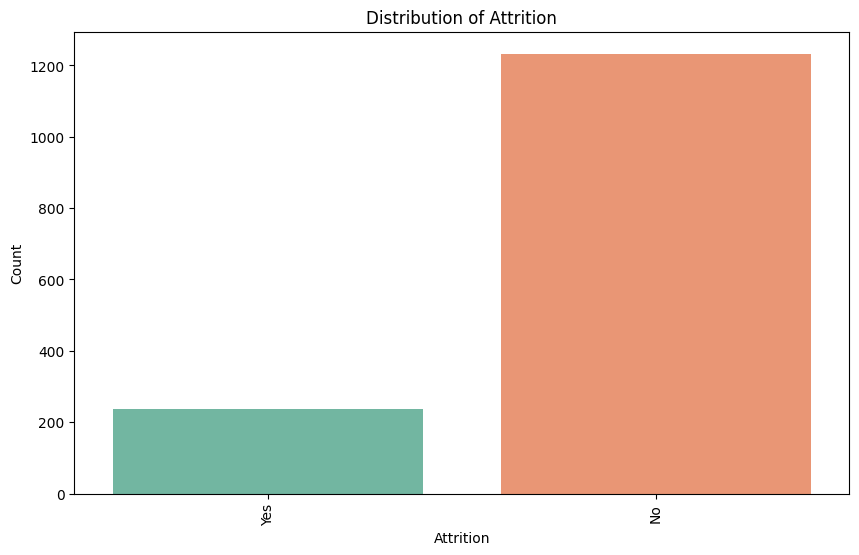

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


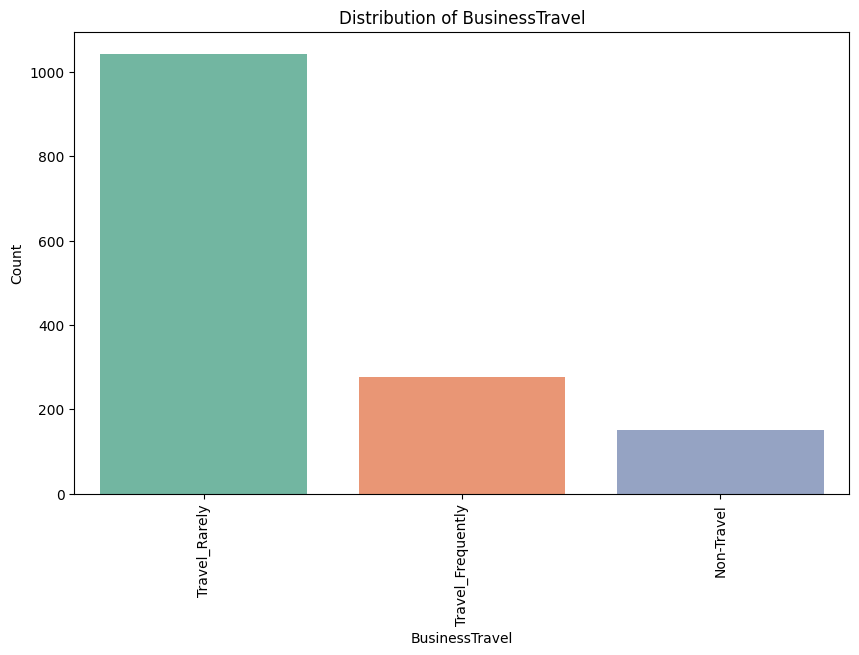

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


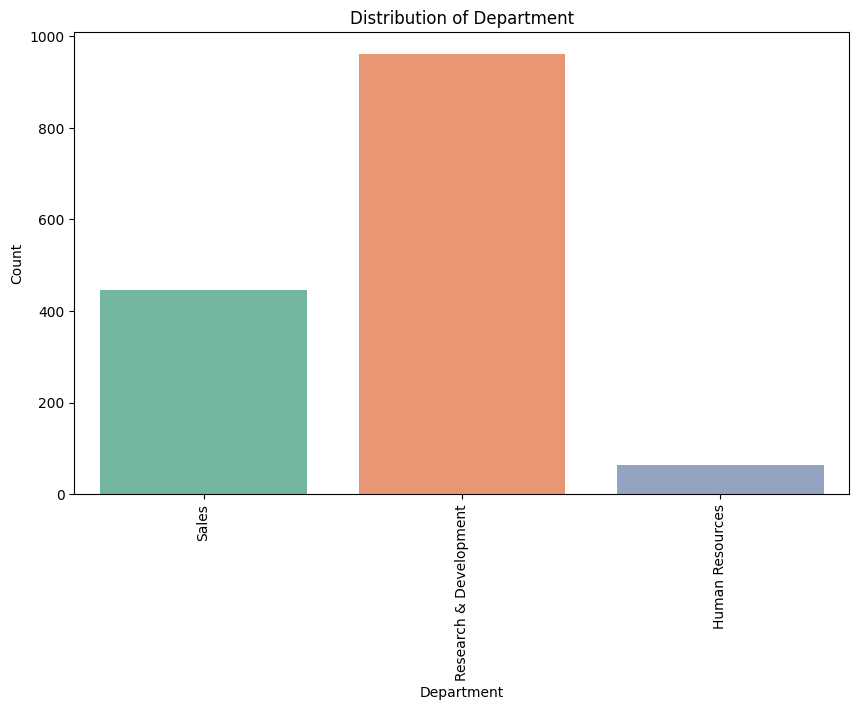

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


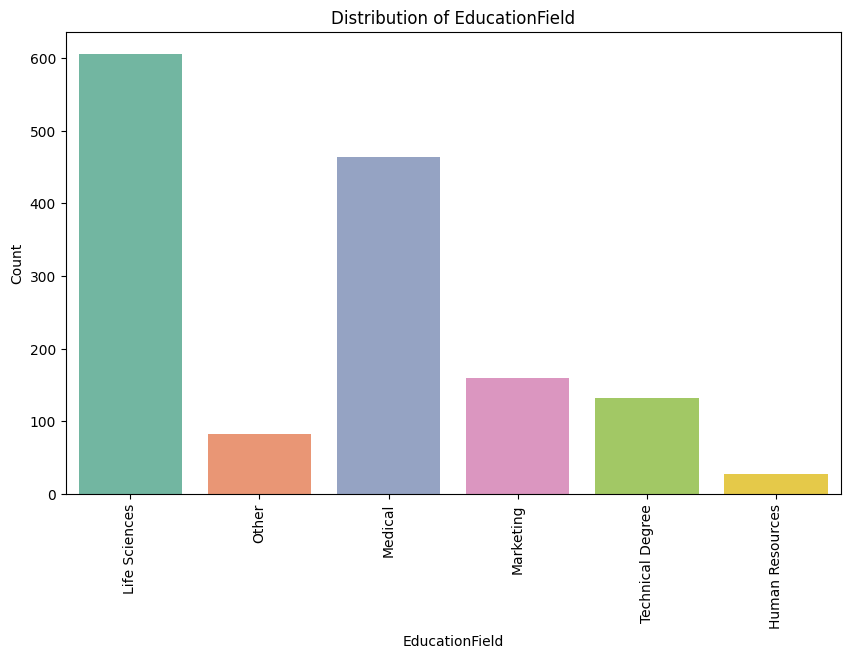

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


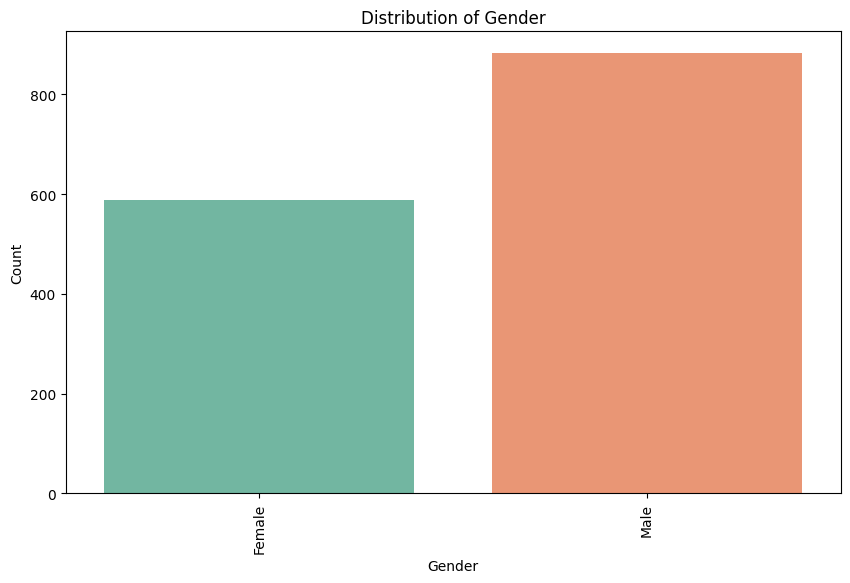

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


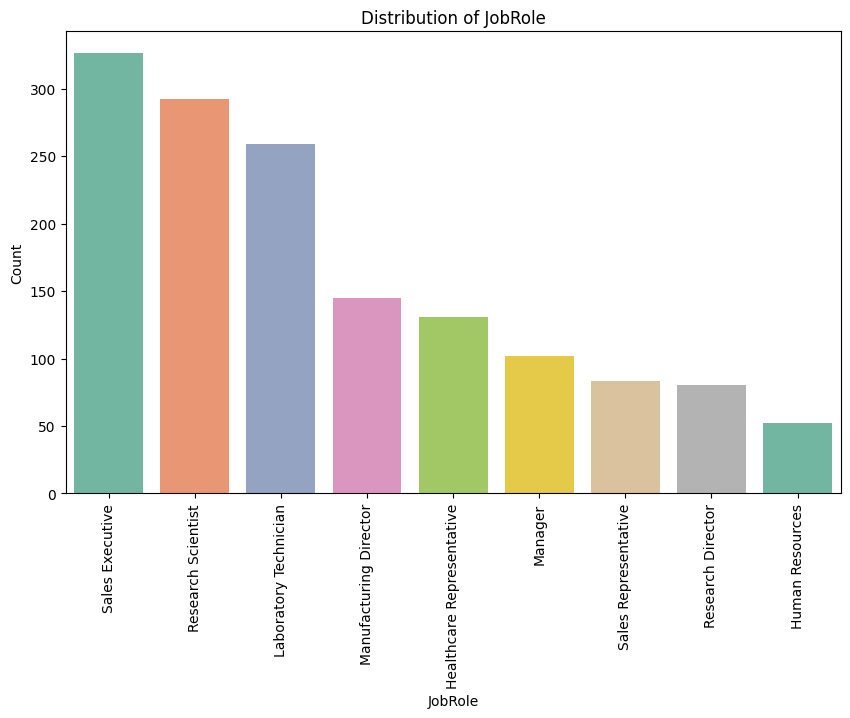

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


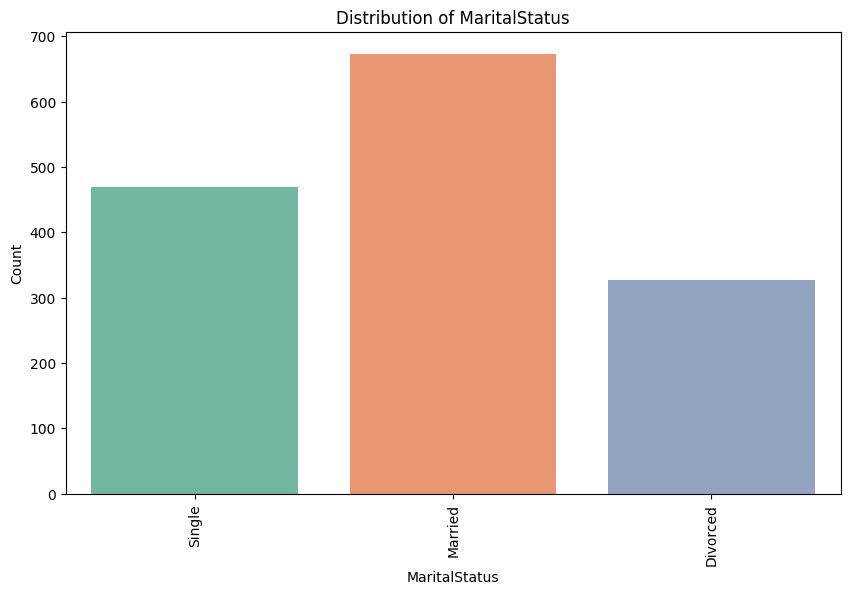

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


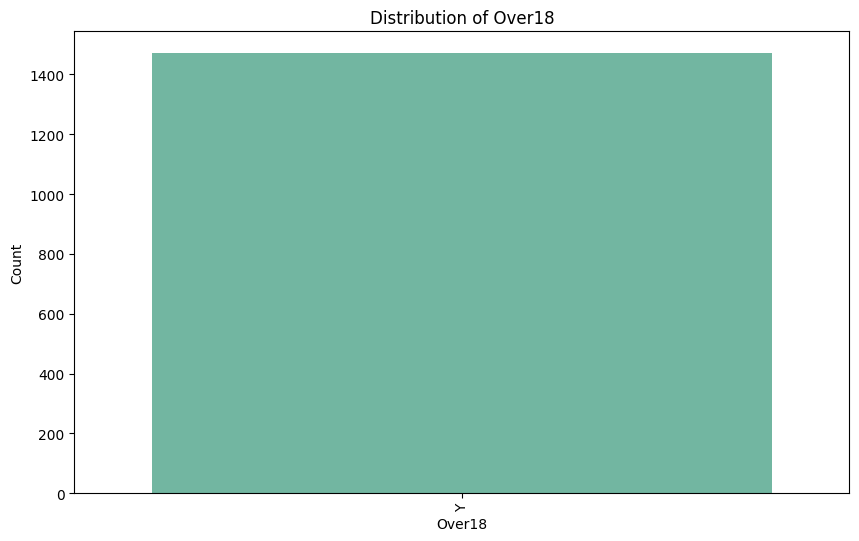

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


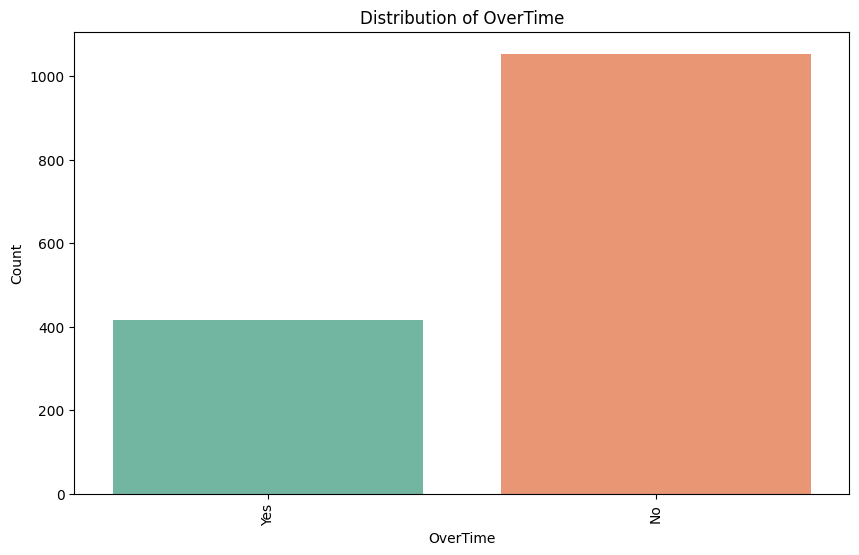

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


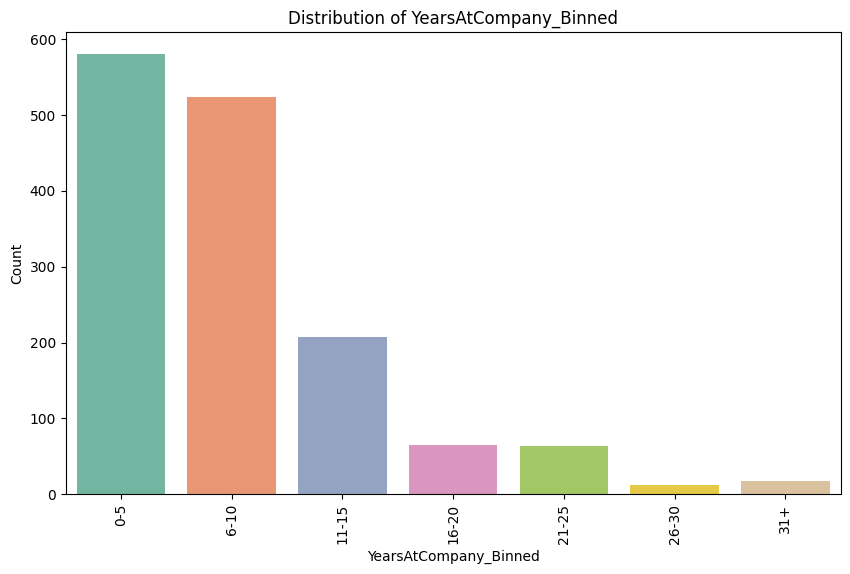

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


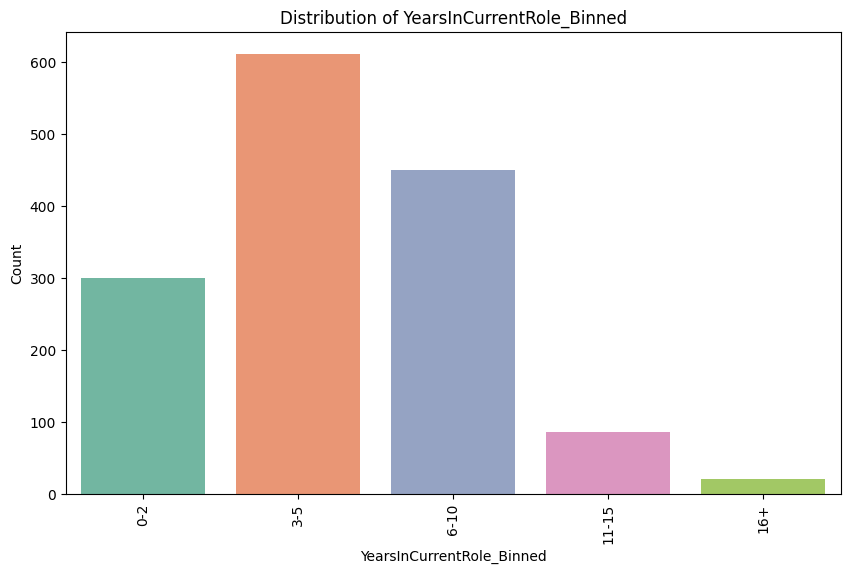

<ipython-input-58-45453b2568b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2')


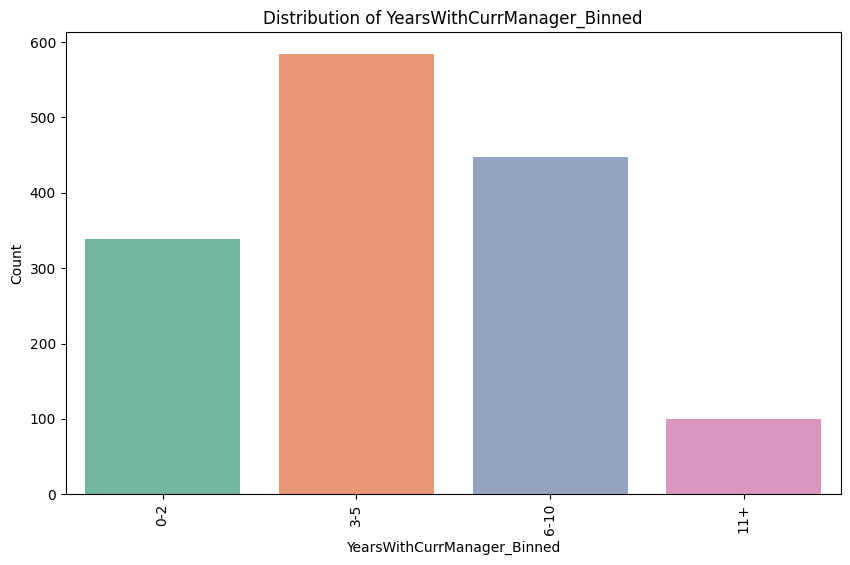

In [ ]:
for feature in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=IBMDATA, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


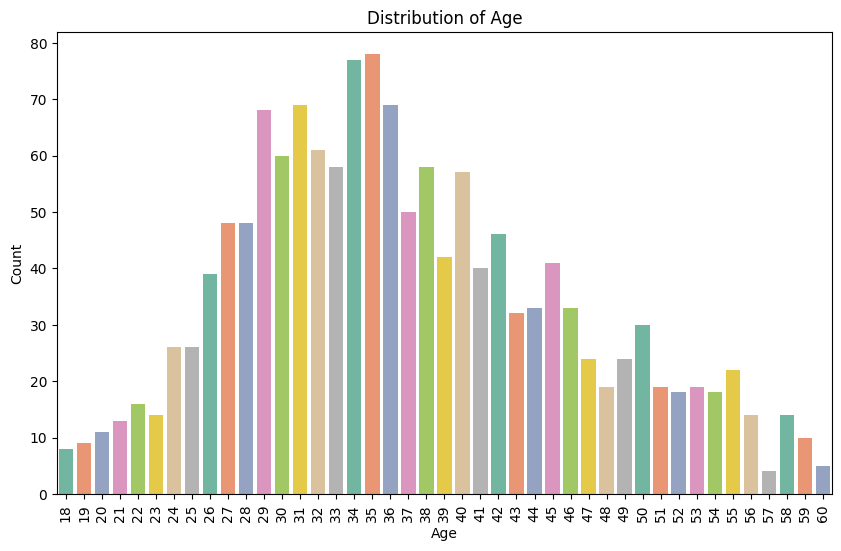

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


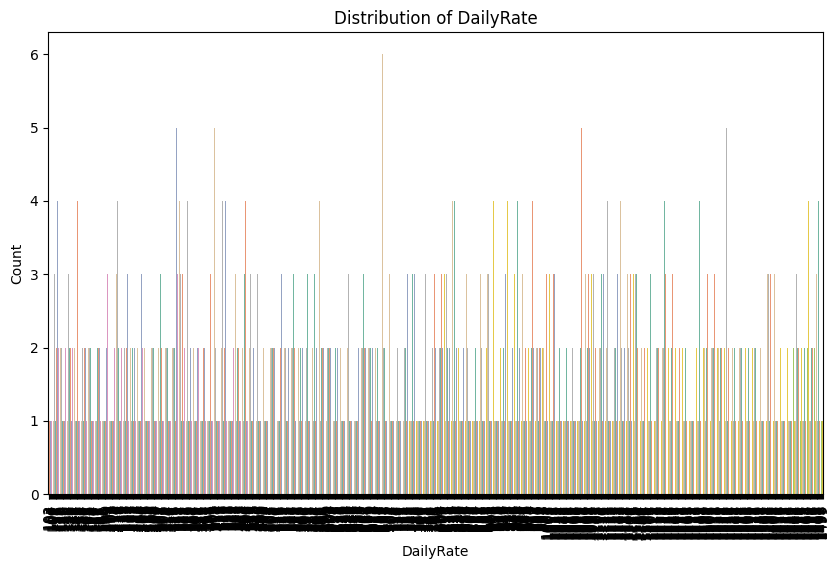

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


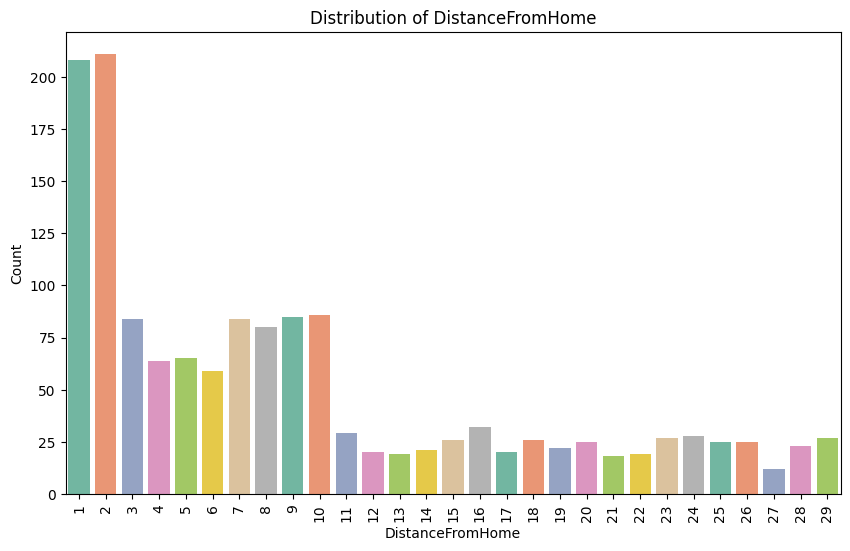

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


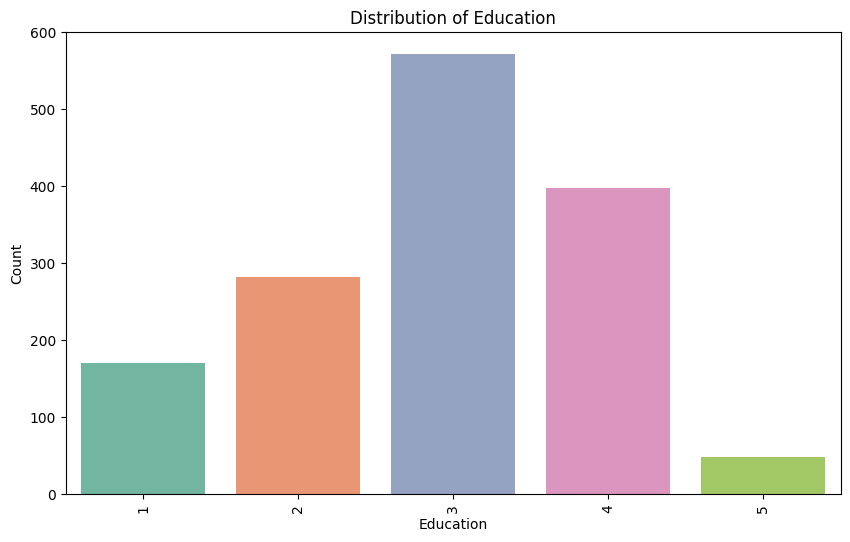

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


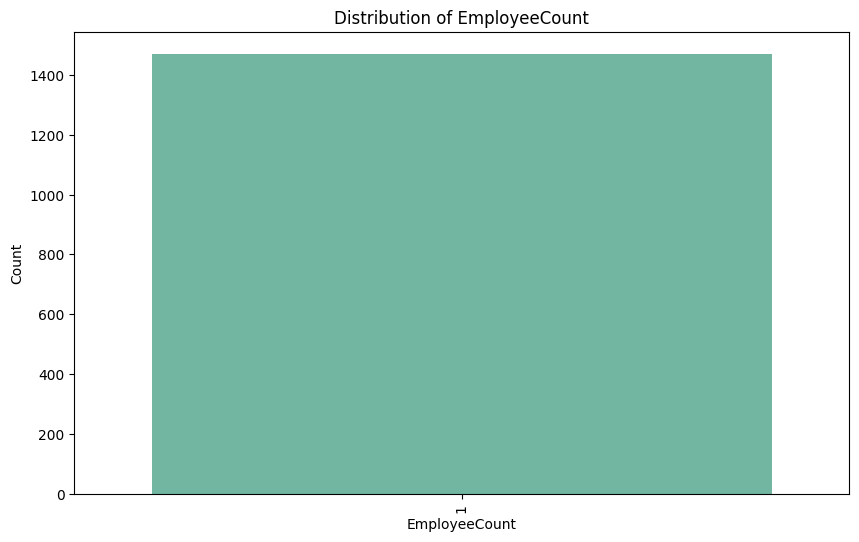

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


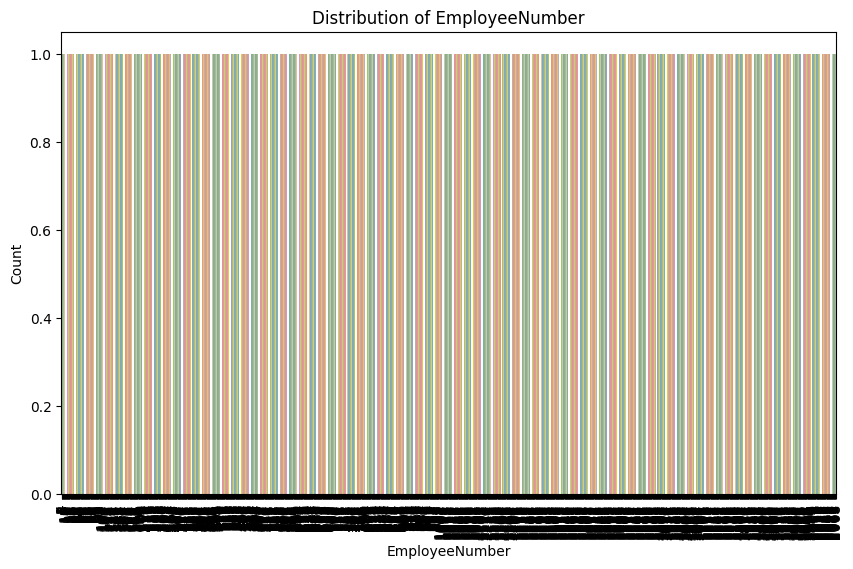

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


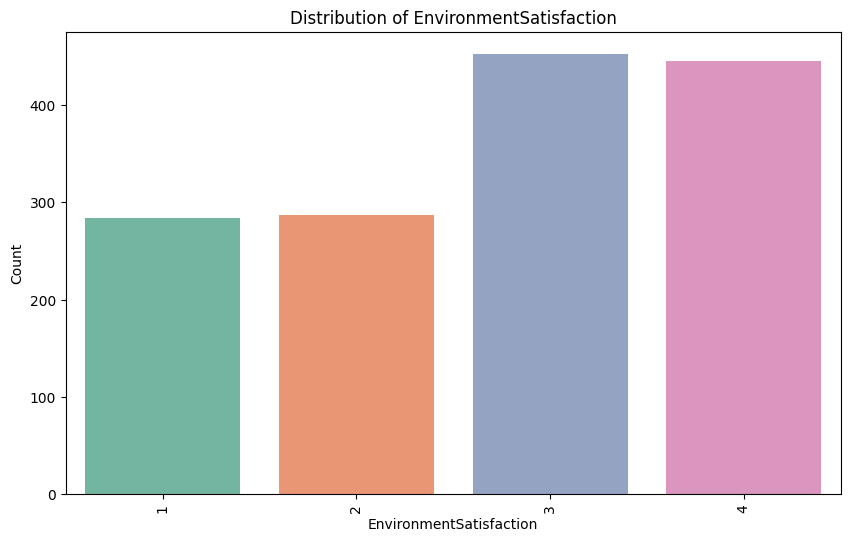

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


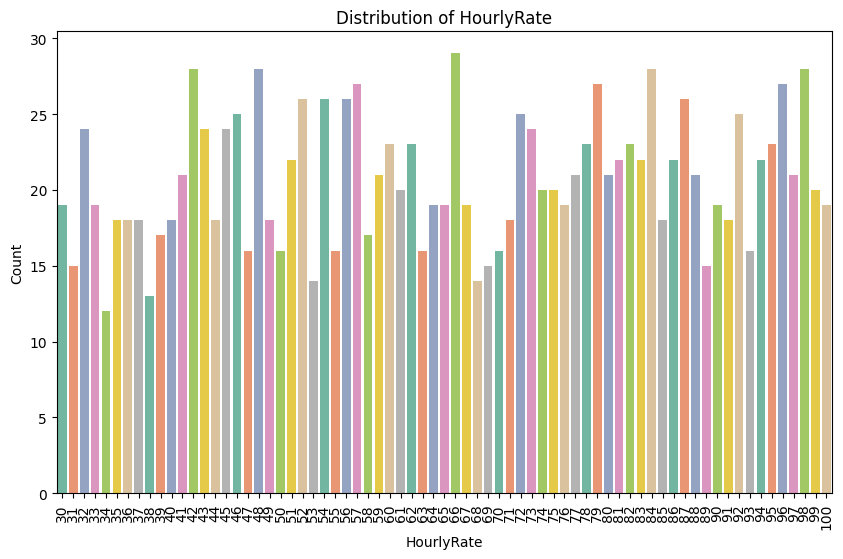

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


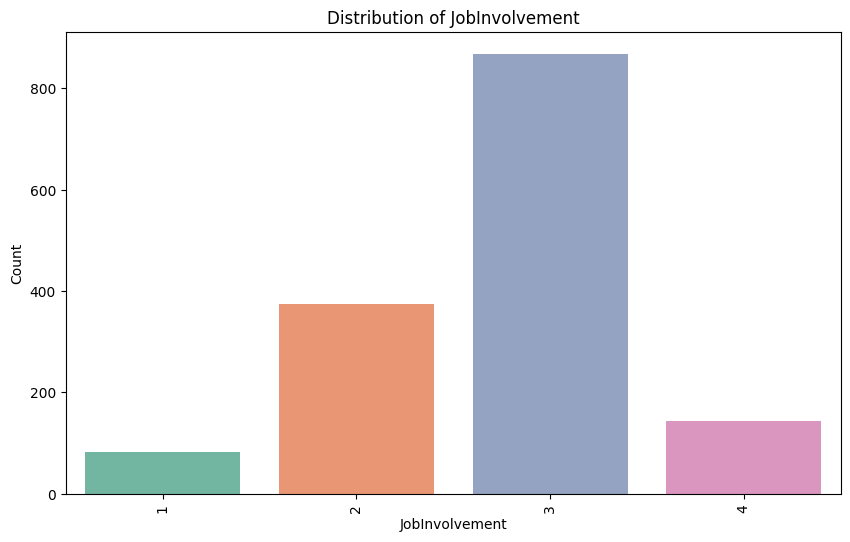

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


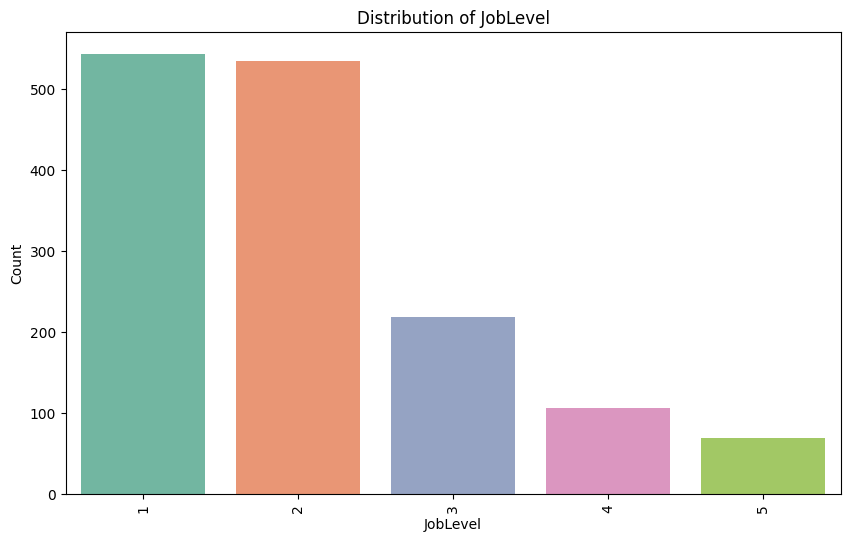

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


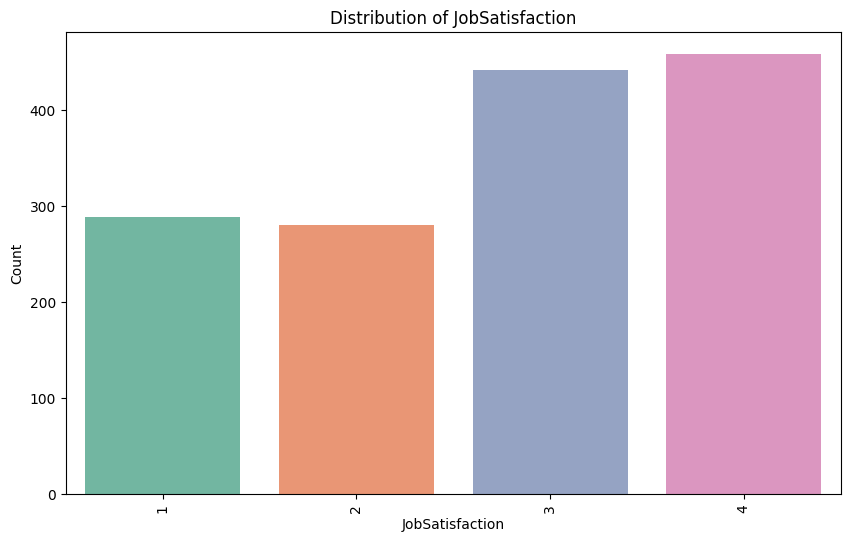

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


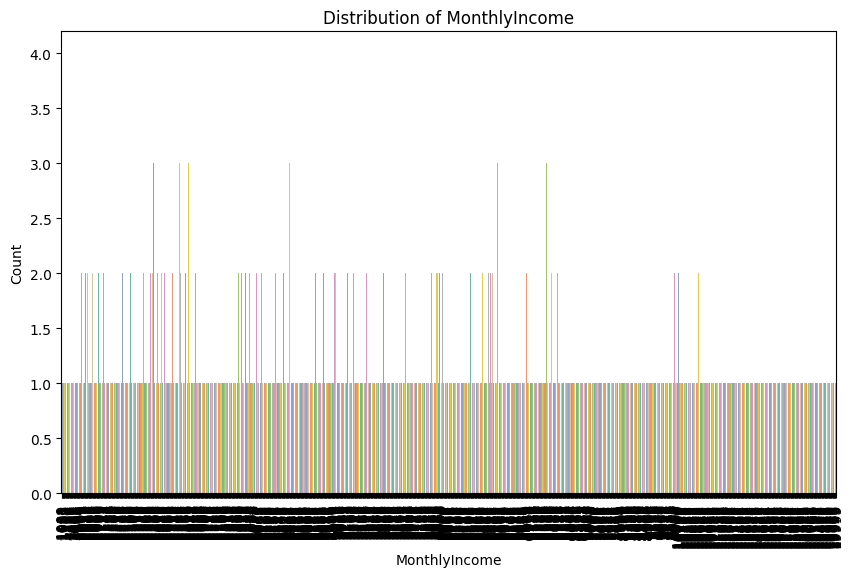

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


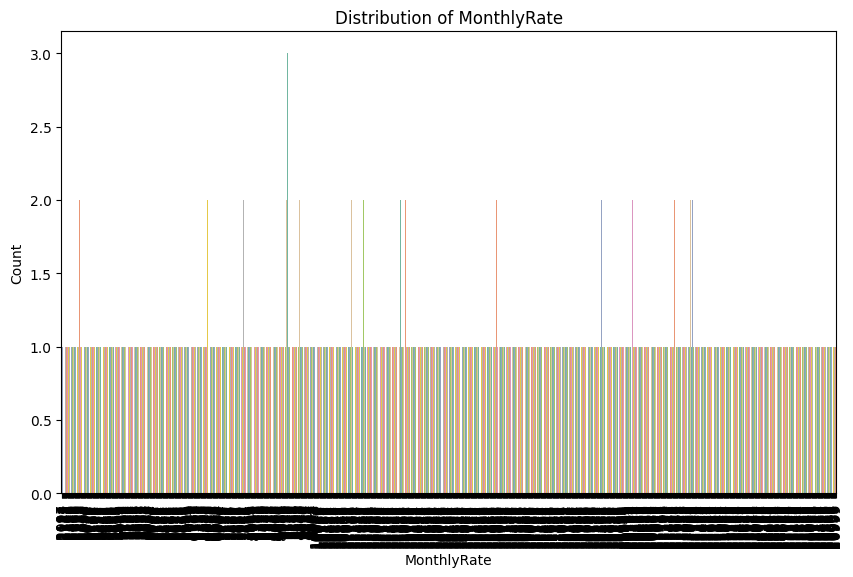

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


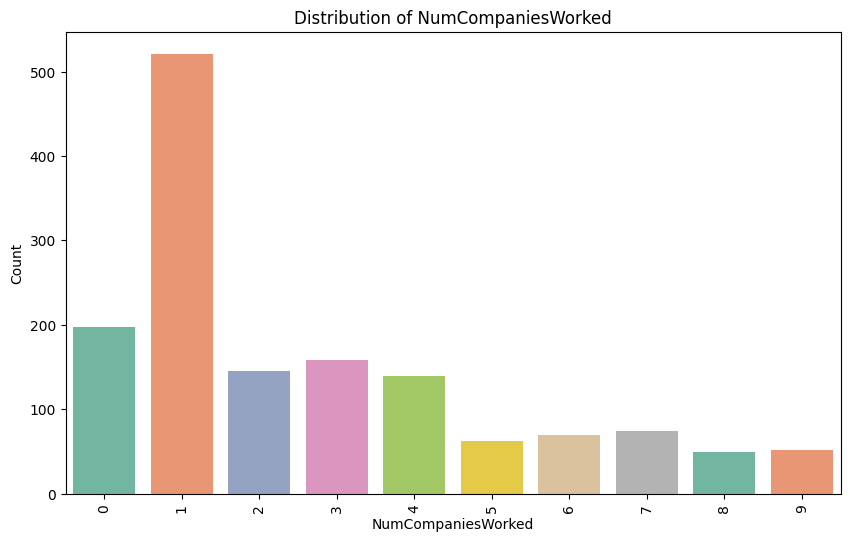

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


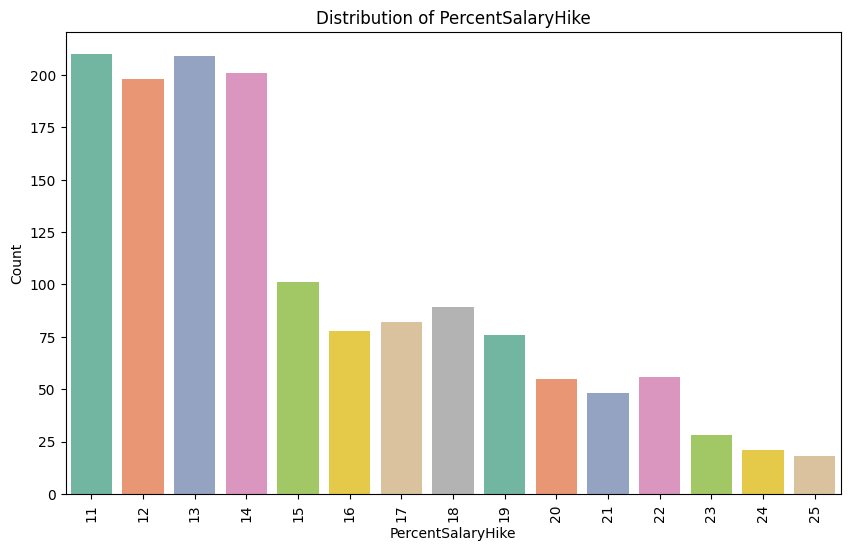

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


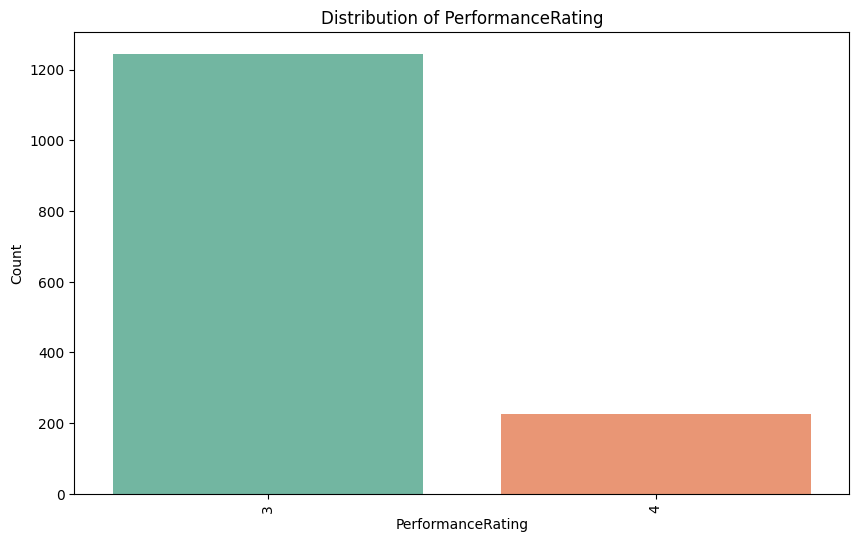

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


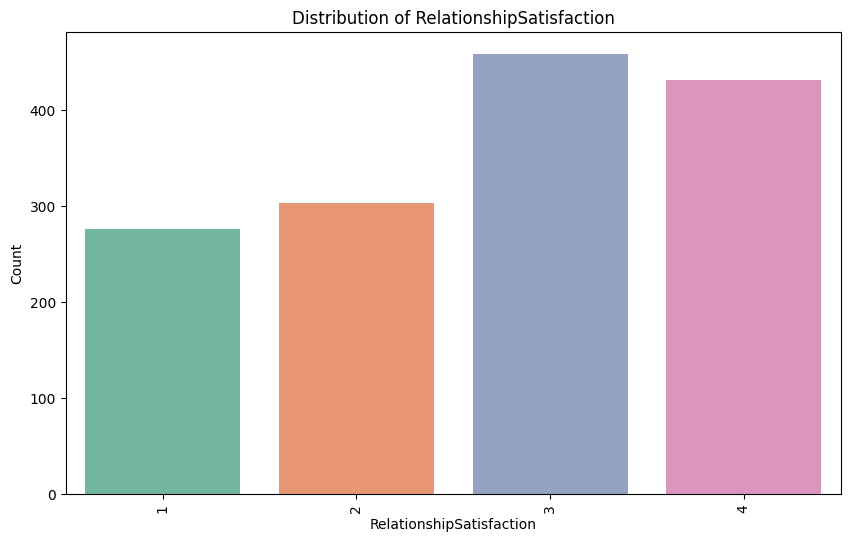

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


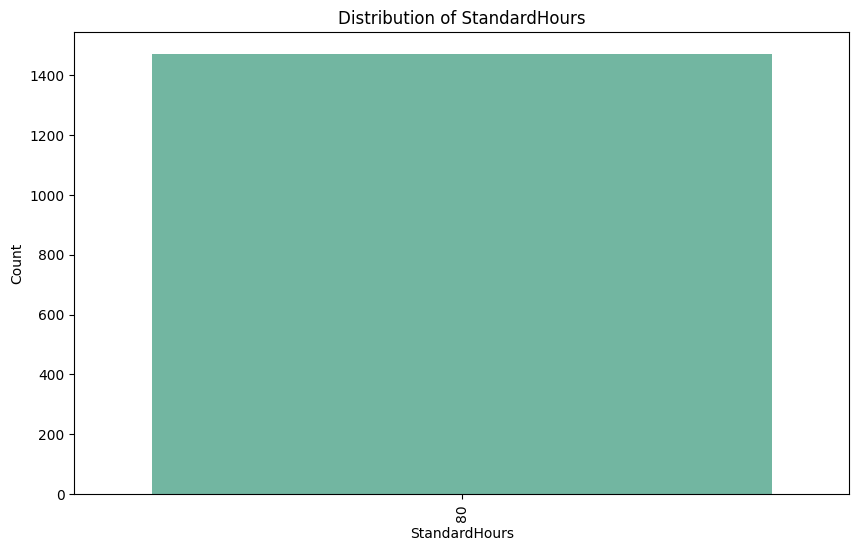

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


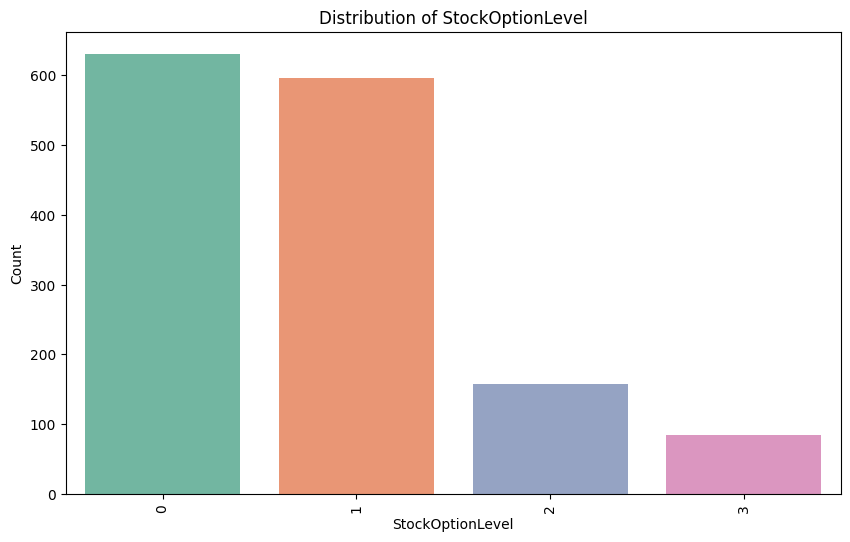

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


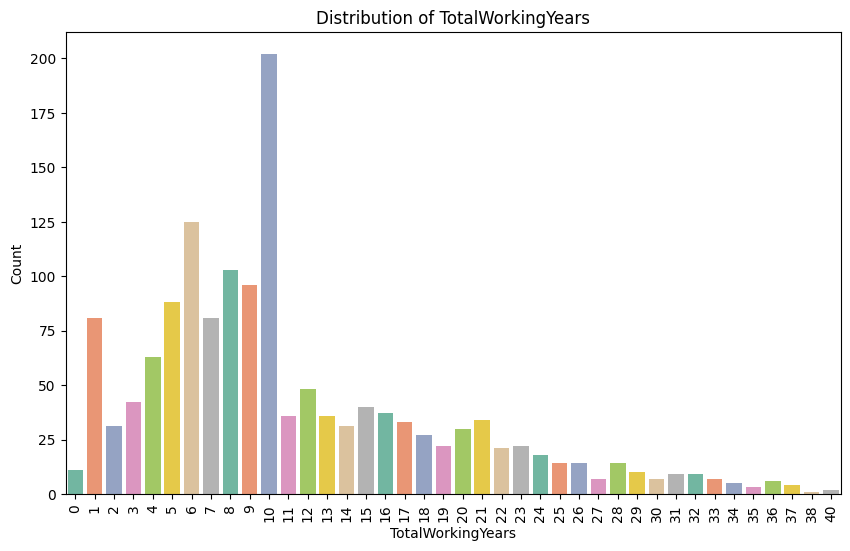

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


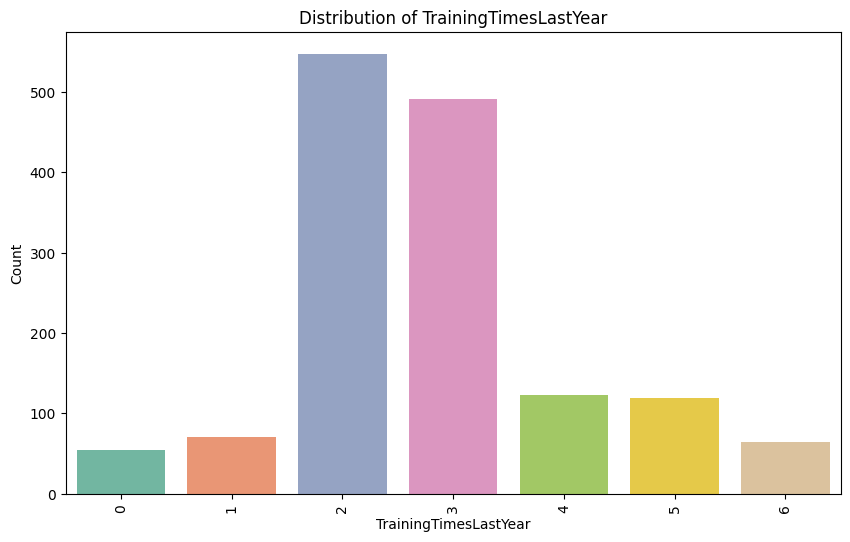

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


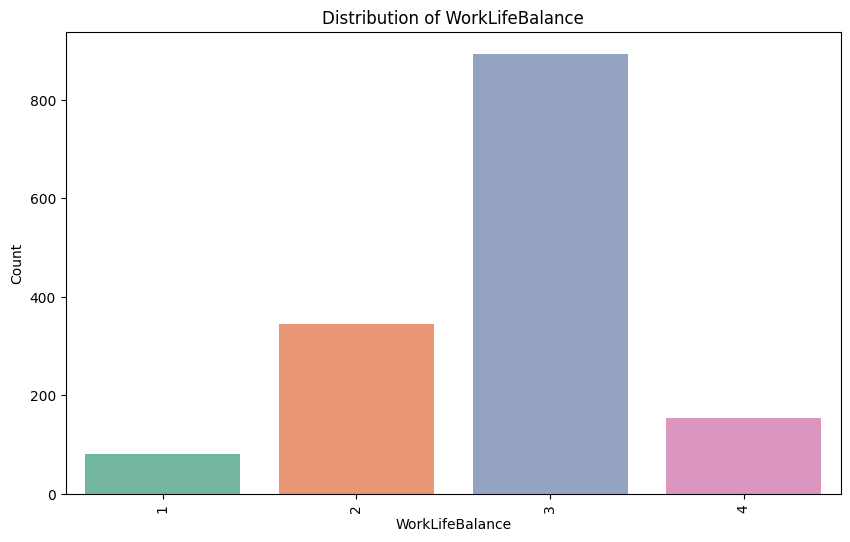

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


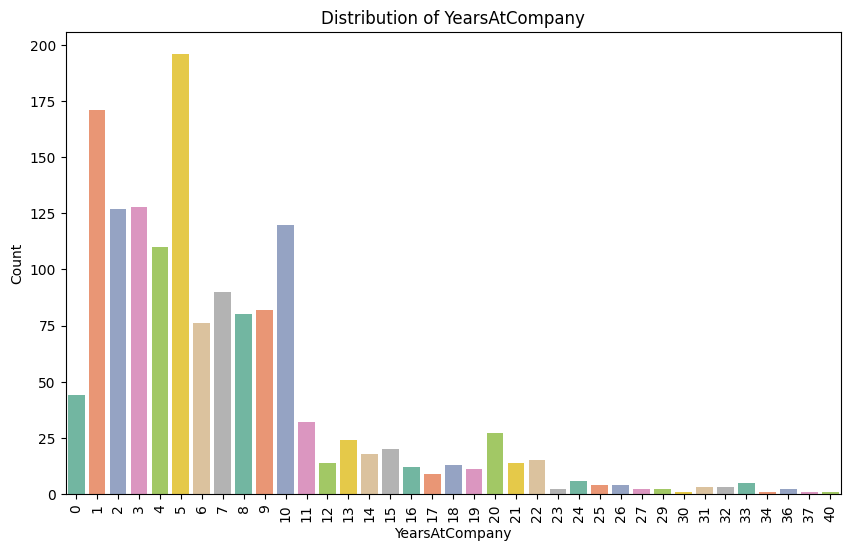

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


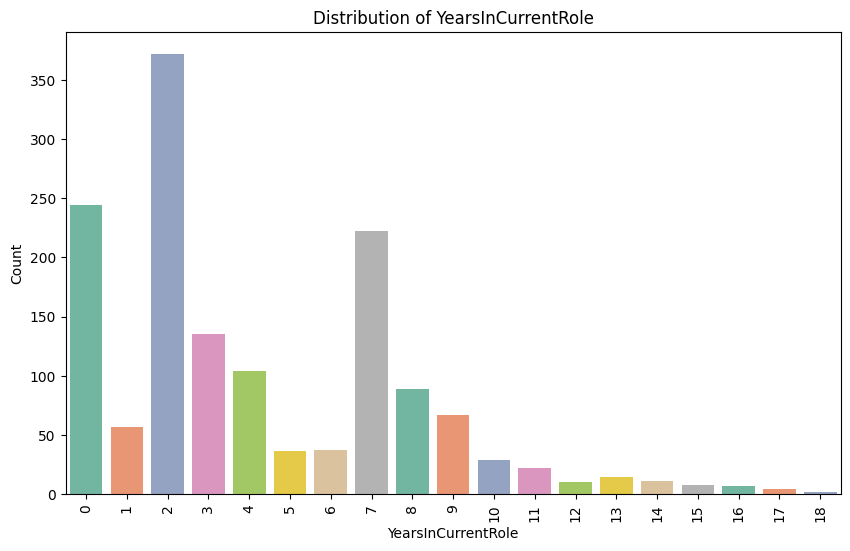

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


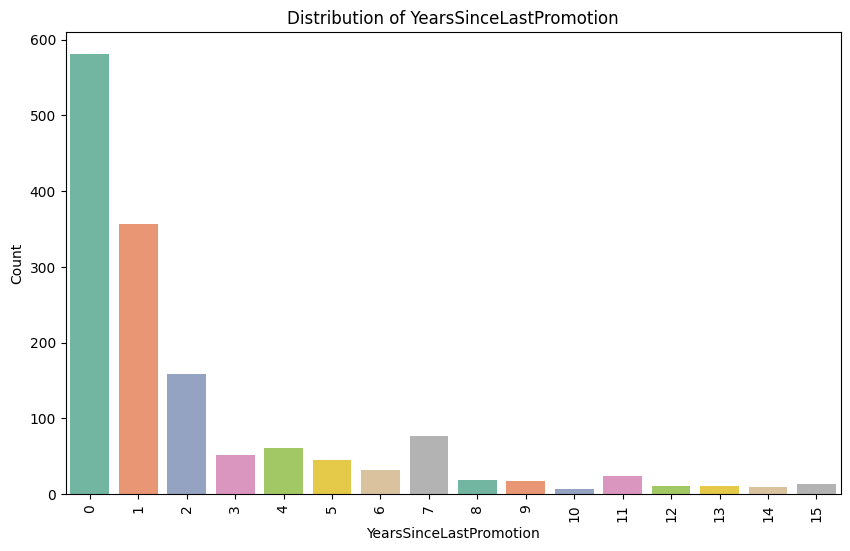

<ipython-input-59-9d69bb88b667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)


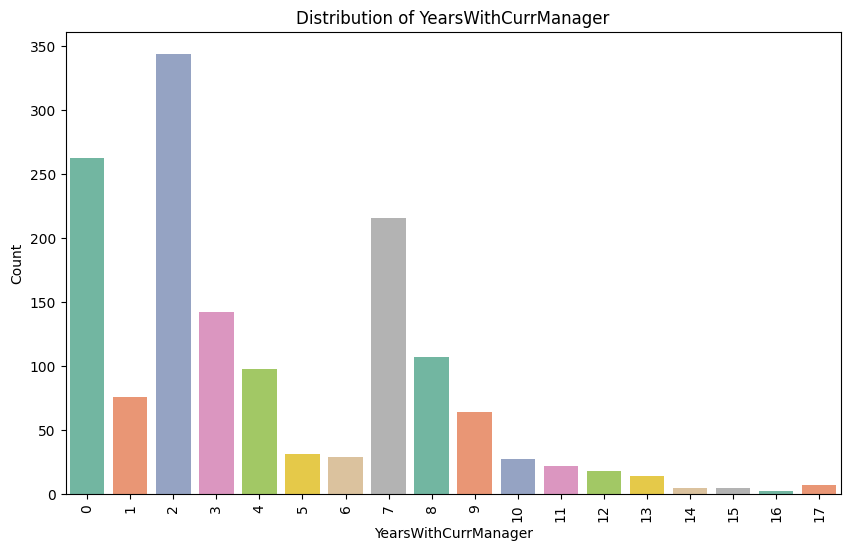

In [ ]:
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=IBMDATA, palette='Set2',legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

<font face="Times New Roman" color="brown">**STATISTICS OF THE DATASET**</font>

In [ ]:
IBMDATA.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<font face="Times New Roman" color="RED">**INSIGHT**</font>

**EmployeeCount:**

The value for every employee is 1 (constant), so this attribute does not provide any useful information for analysis or prediction. It can be removed.

**EmployeeNumber:**

This is a unique identifier for each employee and does not provide meaningful insights or contribute to predictive modeling. It can be removed as it acts as an ID column.

**StandardHours:**

The value for all employees is 80 (constant), providing no variability. This feature does not add any useful information for analysis or prediction and can be removed.

**Over18**

If all employees are over 18 (which is likely the case given that the minimum age is 18), this attribute would not be informative and can be removed.

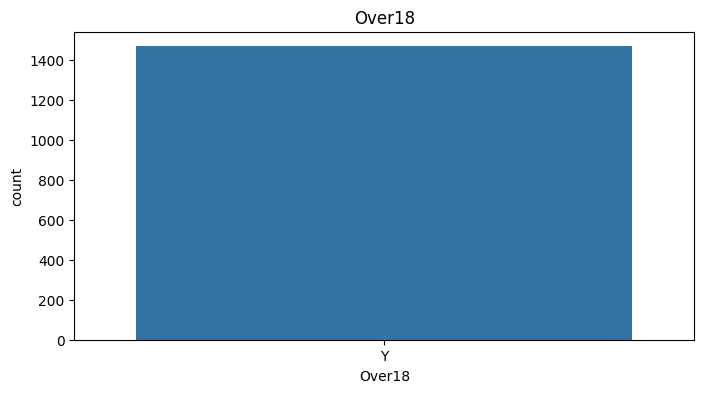

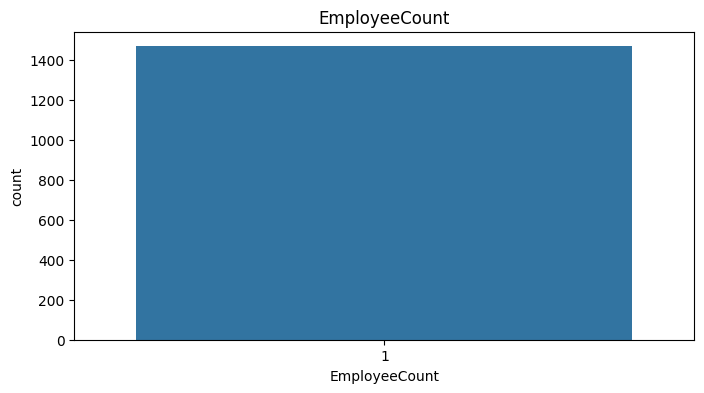

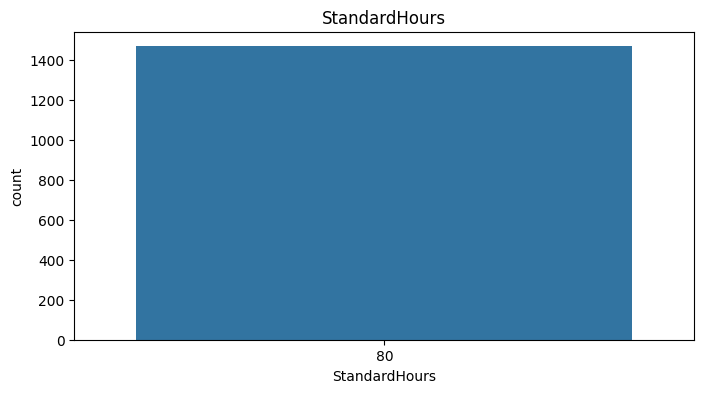

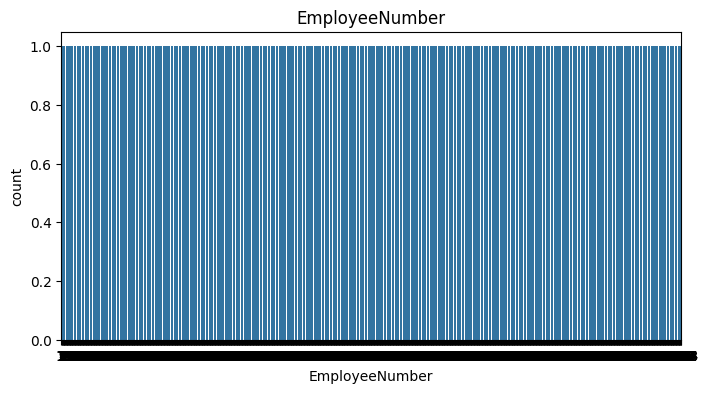

In [ ]:
# List of columns for which to create count plots
columns_to_plot = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']

# Loop through the columns and create count plots
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=IBMDATA, x=col)
    plt.title(f'{col}')
    plt.show()

<font face="Times New Roman" color="green">**DROPING THE UNWANTED ATTRIBUTES**</font>

In [ ]:
columns_to_drop = ['Over18','EmployeeCount','StandardHours','EmployeeNumber']
IBMDATA_D= IBMDATA.drop(columns=columns_to_drop)


# **<font face="Algerian" color="blue">DATA VISUALIZATION</font>**

<ipython-input-13-41e9ab8e1eb9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Blues_d', ax=axs[1])


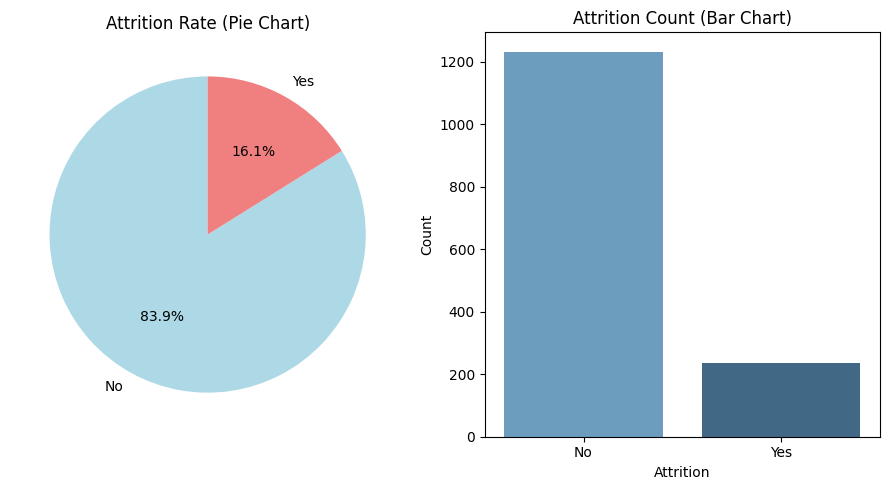

In [ ]:
# Calculate attrition counts
attrition_counts = IBMDATA['Attrition'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9,5))

# Pie chart for attrition rate
axs[0].pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0].set_title('Attrition Rate (Pie Chart)')

# Bar chart for attrition count
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Blues_d', ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_title('Attrition Count (Bar Chart)')

# Adjust layout
plt.tight_layout()
plt.show()


        Total_Employees  Employees_Left  Attrition_Rate
Gender                                                 
Female              588              87       14.795918
Male                882             150       17.006803


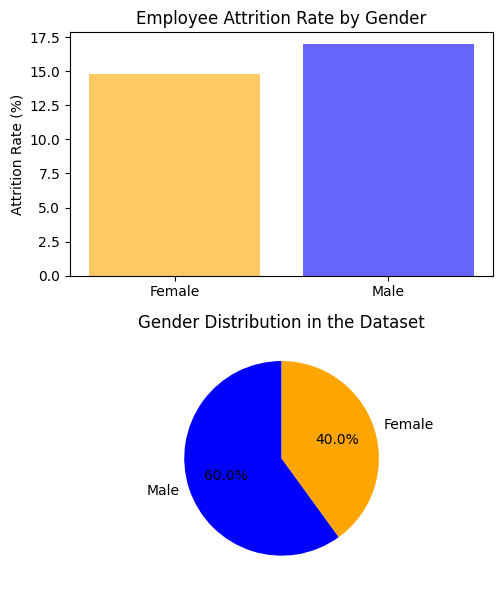

In [ ]:
# Calculate attrition rates by gender
attrition_rates = IBMDATA.groupby('Gender').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_rates['Attrition_Rate'] = (attrition_rates['Employees_Left'] / attrition_rates['Total_Employees']) * 100

# Display the results
print(attrition_rates[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 6))

# Plot 1: Attrition Rate by Gender
axs[0].bar(attrition_rates.index, attrition_rates['Attrition_Rate'], color=['orange', 'blue'], alpha=0.6)
axs[0].set_title('Employee Attrition Rate by Gender')
axs[0].set_ylabel('Attrition Rate (%)')
axs[0].set_xticks(attrition_rates.index)

# Plot 2: Gender Distribution
gender_distribution = IBMDATA['Gender'].value_counts()
axs[1].pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axs[1].set_title('Gender Distribution in the Dataset')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The male attrition rate (17.00%) is slightly higher than the female rate (14.80%), despite males making up 60% of the workforce. This indicates that while both genders experience attrition, male employees have a greater tendency to leave in absolute numbers. Targeted retention strategies may be needed to address this higher turnover among male employees.

<ipython-input-16-ddabb1a00f94>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rates_age = IBMDATA.groupby('Age_Group').agg(


           Total_Employees  Employees_Left  Attrition_Rate
Age_Group                                                 
<30                    326              91       27.914110
30-40                  622              89       14.308682
41-50                  349              34        9.742120
51-60                  168              23       13.690476
60+                      5               0        0.000000


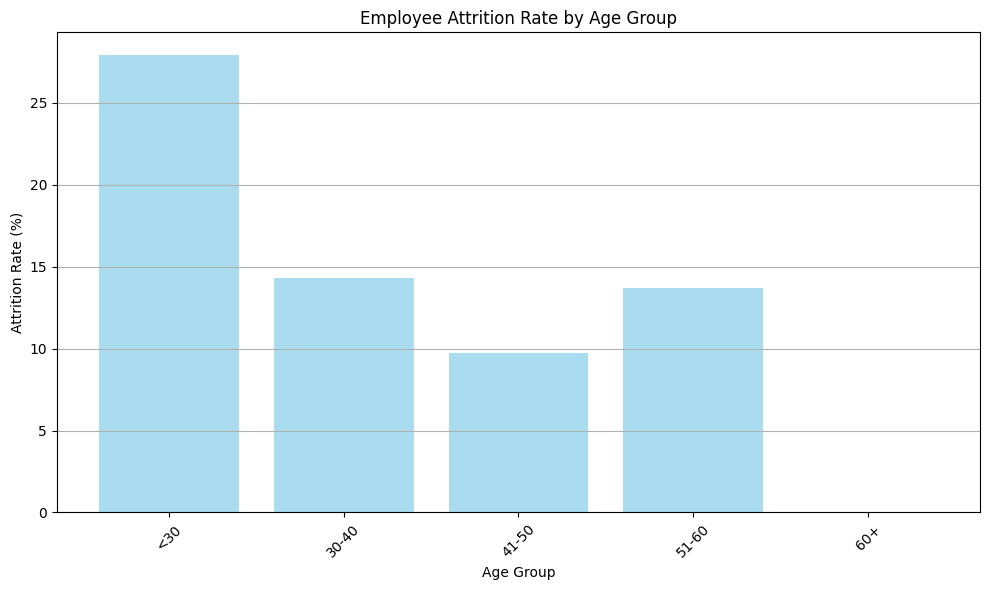

In [ ]:
bins = [0, 30, 40, 50, 60, 100]  # Adjust the upper limit as necessary
labels = ['<30', '30-40', '41-50', '51-60', '60+']
IBMDATA['Age_Group'] = pd.cut(IBMDATA['Age'], bins=bins, labels=labels, right=False)

# Calculate attrition rates by age group
attrition_rates_age = IBMDATA.groupby('Age_Group').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_rates_age['Attrition_Rate'] = (attrition_rates_age['Employees_Left'] / attrition_rates_age['Total_Employees']) * 100

# Display the results
print(attrition_rates_age[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Create a bar plot for attrition rates by age group
plt.figure(figsize=(10, 6))
plt.bar(attrition_rates_age.index, attrition_rates_age['Attrition_Rate'], color='skyblue', alpha=0.7)
plt.title('Employee Attrition Rate by Age Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

The analysis reveals that younger employees (<30) have the highest attrition rate at 27.91%, indicating potential challenges in job satisfaction or career growth.

In contrast, the attrition rate decreases significantly for the 30-40 age group (14.31%) and is lowest for those 41-50 (9.74%).

This suggests that employees in the younger age bracket tend to leave the company more frequently.

                   Total_Employees  Employees_Left  Attrition_Rate
BusinessTravel                                                    
Non-Travel                     150              12        8.000000
Travel_Frequently              277              69       24.909747
Travel_Rarely                 1043             156       14.956855


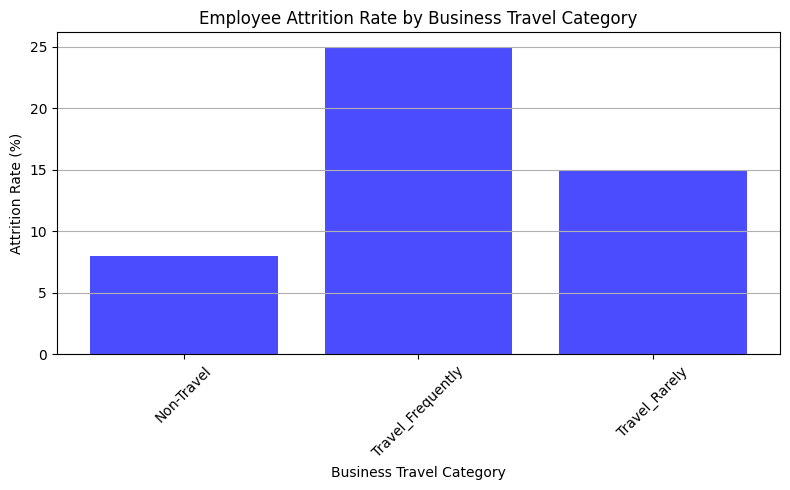

In [ ]:
# Calculate attrition rates by Business Travel
attrition_rates_travel = IBMDATA.groupby('BusinessTravel').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_rates_travel['Attrition_Rate'] = (attrition_rates_travel['Employees_Left'] / attrition_rates_travel['Total_Employees']) * 100

# Display the results
print(attrition_rates_travel[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Create a bar plot for attrition rates by Business Travel
plt.figure(figsize=(8, 5))
plt.bar(attrition_rates_travel.index, attrition_rates_travel['Attrition_Rate'], color='blue', alpha=0.7)
plt.title('Employee Attrition Rate by Business Travel Category')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Business Travel Category')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The analysis reveals that employees in the Travel_Frequently category have the highest attrition rate at 24.91%, while those in the Non-Travel category have the lowest at 8.00%.

 Employees who travel rarely fall in between with a rate of 14.96%.

 To improve retention, the company should consider addressing the challenges faced by frequent travelers, such as job satisfaction and work-life balance.

                        Total_Employees  Employees_Left  Attrition_Rate
Department                                                             
Human Resources                      63              12       19.047619
Research & Development              961             133       13.839750
Sales                               446              92       20.627803


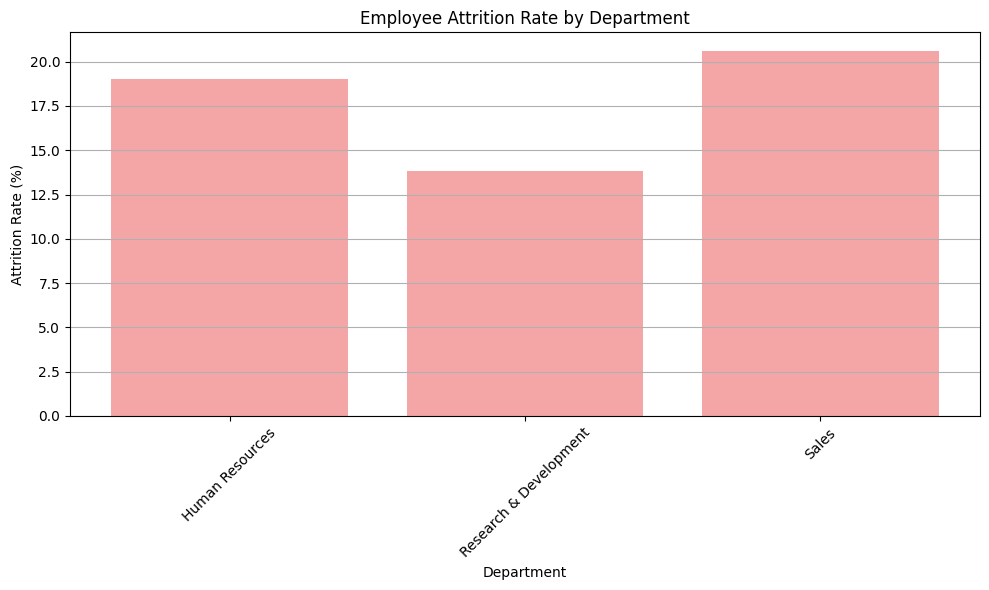

In [ ]:
# Calculate attrition rates by Department
attrition_rates_department = IBMDATA.groupby('Department').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_rates_department['Attrition_Rate'] = (attrition_rates_department['Employees_Left'] / attrition_rates_department['Total_Employees']) * 100

# Display the results
print(attrition_rates_department[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Create a bar plot for attrition rates by Department
plt.figure(figsize=(10, 6))
plt.bar(attrition_rates_department.index, attrition_rates_department['Attrition_Rate'], color='lightcoral', alpha=0.7)
plt.title('Employee Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The Sales department has the highest attrition rate at 20.63%, indicating potential dissatisfaction, while Human Resources also has a high rate of 19.05%. In contrast, Research & Development shows a lower attrition rate of 13.84%, suggesting better retention.

 It is crucial to conduct exit interviews and enhance employee engagement initiatives in high attrition departments to improve overall retention.

<ipython-input-20-c7fa35b2a78f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rates_daily_rate = IBMDATA.groupby('Daily_Rate_Category').agg(


                     Total_Employees  Employees_Left  Attrition_Rate
Daily_Rate_Category                                                 
Low                              197              34       17.258883
Medium Low                       331              64       19.335347
Medium                           312              53       16.987179
Medium High                      308              43       13.961039
High                             322              43       13.354037


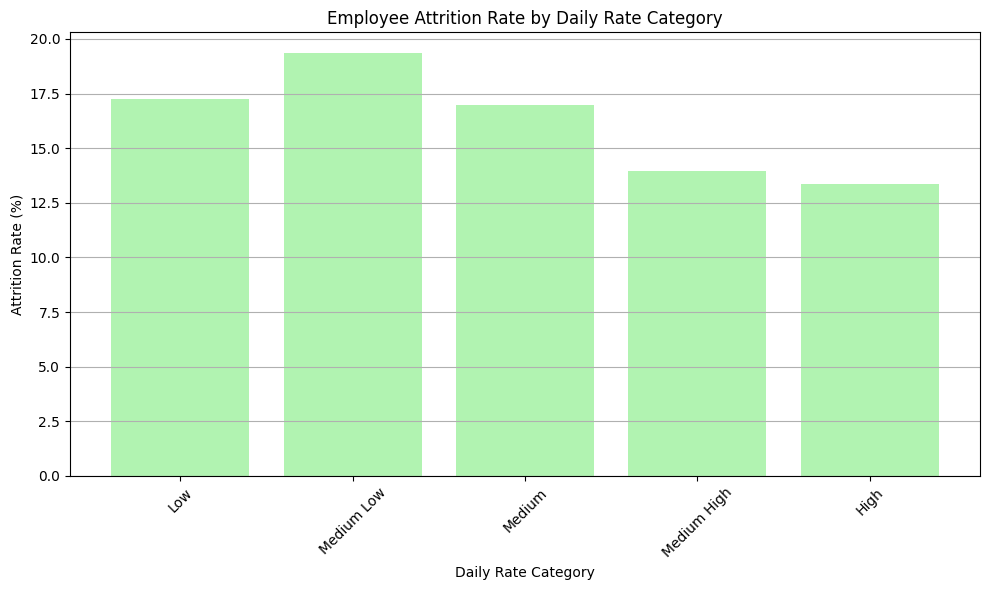

In [ ]:
# Create bins for Daily Rate
bins = [0, 300, 600, 900, 1200, 1500]  # Define bins
labels = ['Low', 'Medium Low', 'Medium', 'Medium High', 'High']  # Define labels for bins

# Create a new column for Daily Rate Category
IBMDATA['Daily_Rate_Category'] = pd.cut(IBMDATA['DailyRate'], bins=bins, labels=labels)

# Calculate attrition rates by Daily Rate Category
attrition_rates_daily_rate = IBMDATA.groupby('Daily_Rate_Category').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_rates_daily_rate['Attrition_Rate'] = (attrition_rates_daily_rate['Employees_Left'] / attrition_rates_daily_rate['Total_Employees']) * 100

# Display the results
print(attrition_rates_daily_rate[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Create a bar plot for attrition rates by Daily Rate Category
plt.figure(figsize=(10, 6))
plt.bar(attrition_rates_daily_rate.index.astype(str), attrition_rates_daily_rate['Attrition_Rate'], color='lightgreen', alpha=0.7)
plt.title('Employee Attrition Rate by Daily Rate Category')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Daily Rate Category')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees in the Low and Medium Low daily rate categories have the highest attrition rates at 17.26% and 19.34%, respectively, indicating potential dissatisfaction.

 In contrast, attrition rates decrease in the Medium High and High categories, which have the lowest rates at 13.96% and 13.35%.

 This suggests that higher compensation may enhance retention, highlighting the need for targeted strategies to improve employee satisfaction in lower-paying categories.

<ipython-input-5-13c657a3d7f4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_income = IBMDATA.groupby('Income_Category').agg(


                 Total_Employees  Employees_Left  Attrition_Rate
Income_Category                                                 
1000-5000                    749             163       21.762350
5001-9000                    388              40       10.309278
9001-13000                   148              25       16.891892
13001-17000                   88               4        4.545455
17001-20000                   97               5        5.154639


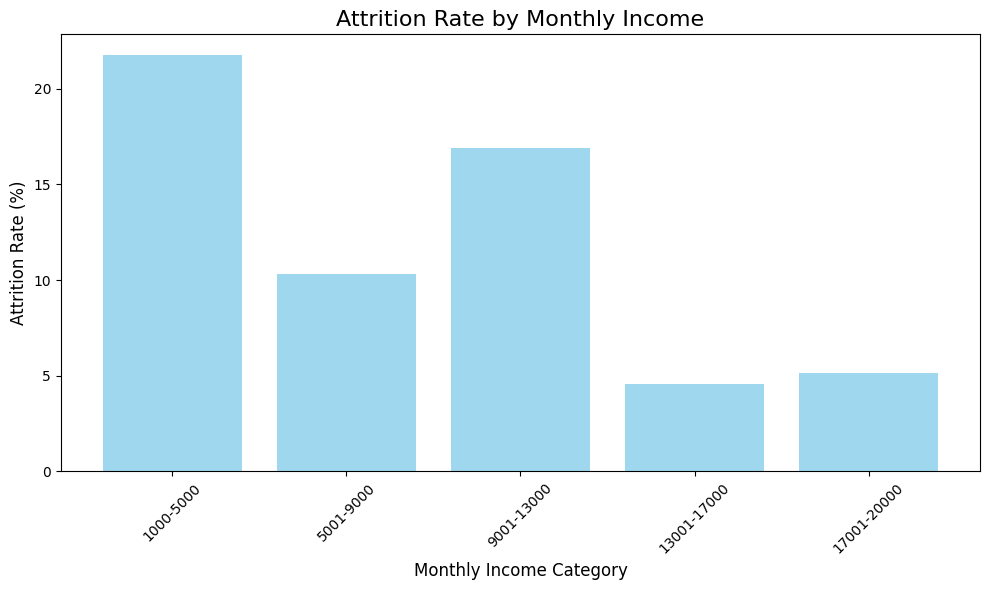

In [ ]:
# Define custom income categories based on the range from 1000 to 19999
IBMDATA['Income_Category'] = pd.cut(IBMDATA['MonthlyIncome'],
                                    bins=[1000, 5000, 9000, 13000, 17000, 20000],
                                    labels=['1000-5000', '5001-9000', '9001-13000', '13001-17000', '17001-20000'])

# Group by Income Category and calculate attrition rate
attrition_income = IBMDATA.groupby('Income_Category').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_income['Attrition_Rate'] = (attrition_income['Employees_Left'] / attrition_income['Total_Employees']) * 100

# Display the results
print(attrition_income[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])


# Plotting the attrition rate by income category
plt.figure(figsize=(10, 6))

# Bar plot for attrition rate
plt.bar(attrition_income.index, attrition_income['Attrition_Rate'], color='skyblue', alpha=0.8)

# Adding titles and labels
plt.title('Attrition Rate by Monthly Income', fontsize=16)
plt.xlabel('Monthly Income Category', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()



<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees in the 1000-5000 income range have the highest attrition rate at 21.76%, indicating potential dissatisfaction. As income increases, attrition rates drop significantly, with the 13001-17000 and 17001-20000 ranges showing the lowest rates, below 5.2%.

Improving retention strategies for lower-income employees could help reduce turnover.

          Total_Employees  Employees_Left  Attrition_Rate
OverTime                                                 
No                   1054             110       10.436433
Yes                   416             127       30.528846


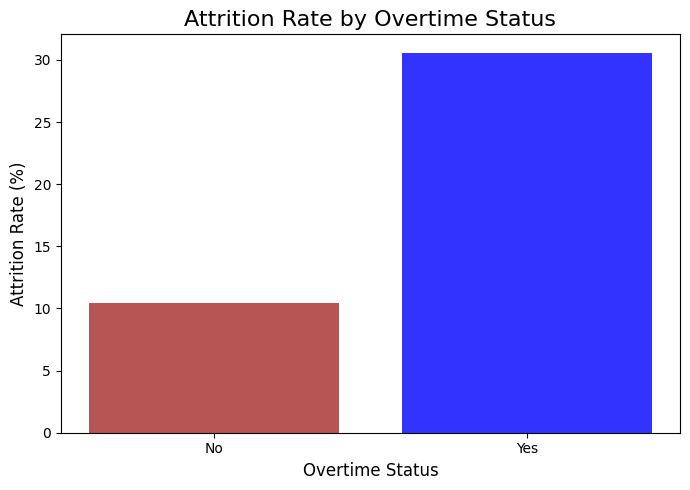

In [ ]:
# Group by 'OverTime' and calculate attrition rate
attrition_overtime = IBMDATA.groupby('OverTime').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_overtime['Attrition_Rate'] = (attrition_overtime['Employees_Left'] / attrition_overtime['Total_Employees']) * 100

# Display the results
print(attrition_overtime[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])
# Plotting the attrition rate by overtime
plt.figure(figsize=(7, 5))

# Bar plot for attrition rate by overtime
plt.bar(attrition_overtime.index, attrition_overtime['Attrition_Rate'], color=['brown', 'blue'], alpha=0.8)

# Adding titles and labels
plt.title('Attrition Rate by Overtime Status', fontsize=16)
plt.xlabel('Overtime Status', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees working overtime have a high attrition rate of 30.53%, while those who don't work overtime have a lower rate of 10.44%.

 This suggests that overtime may contribute to employee turnover.

  Reducing overtime or offering better support for overtime workers could help improve retention

                  Total_Employees  Employees_Left  Attrition_Rate
StockOptionLevel                                                 
0                             631             154       24.405705
1                             596              56        9.395973
2                             158              12        7.594937
3                              85              15       17.647059


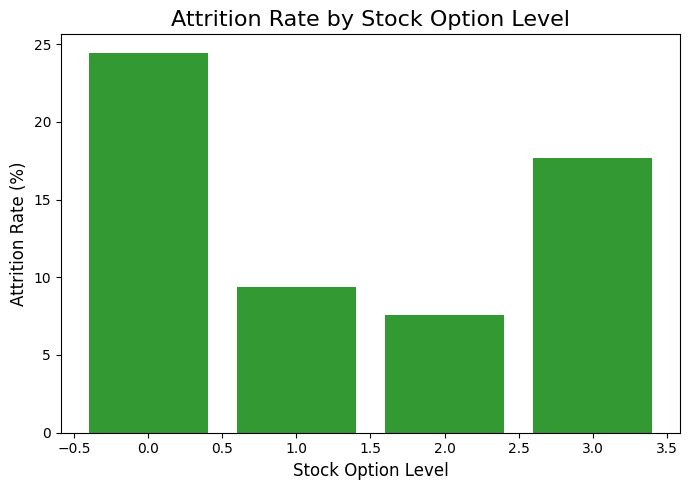

In [ ]:
# Group by 'StockOptionLevel' and calculate attrition rate
attrition_stock_option = IBMDATA.groupby('StockOptionLevel').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_stock_option['Attrition_Rate'] = (attrition_stock_option['Employees_Left'] / attrition_stock_option['Total_Employees']) * 100

# Display the results
print(attrition_stock_option[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])
# Plotting the attrition rate by stock option level
plt.figure(figsize=(7, 5))

# Bar plot for attrition rate by stock option level
plt.bar(attrition_stock_option.index, attrition_stock_option['Attrition_Rate'], color='green', alpha=0.8)

# Adding titles and labels
plt.title('Attrition Rate by Stock Option Level', fontsize=16)
plt.xlabel('Stock Option Level', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with Stock Option Level 0 have the highest attrition rate at 24.41%, suggesting that lack of stock options contributes to turnover.

 In contrast, Levels 1 and 2 show significantly lower attrition rates of 9.40% and 7.59%, indicating that stock options aid in retention.

 To improve retention, consider offering stock options to Level 0 employees and investigate the reasons behind the attrition of Level 3 employees.

                         Total_Employees  Employees_Left  Attrition_Rate
EnvironmentSatisfaction                                                 
1                                    284              72       25.352113
2                                    287              43       14.982578
3                                    453              62       13.686534
4                                    446              60       13.452915


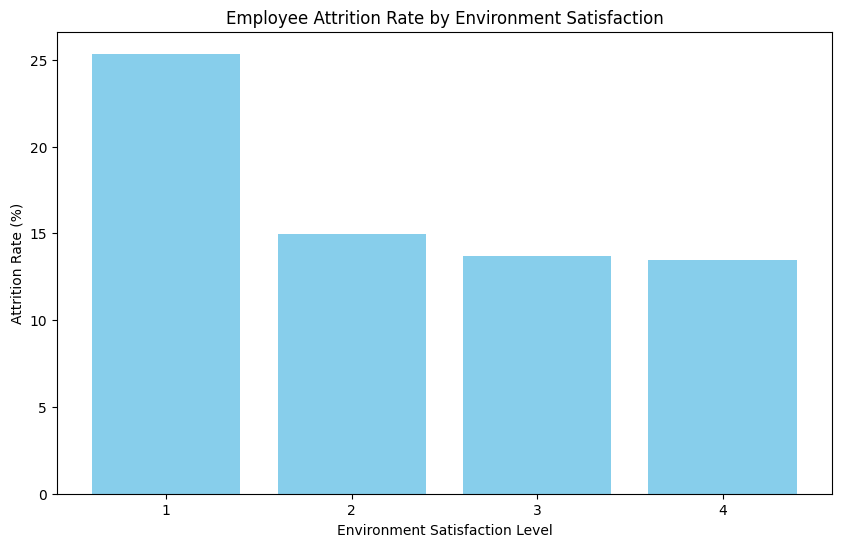

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assume IBMDATA is your DataFrame
# Group by Environment Satisfaction and calculate attrition rates
attrition_by_env_satisfaction = IBMDATA.groupby('EnvironmentSatisfaction').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_env_satisfaction['Attrition_Rate'] = (
    attrition_by_env_satisfaction['Employees_Left'] / attrition_by_env_satisfaction['Total_Employees']
) * 100

# Display the results
print(attrition_by_env_satisfaction[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_env_satisfaction.index, attrition_by_env_satisfaction['Attrition_Rate'], color='skyblue')
plt.title('Employee Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_env_satisfaction.index)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with low environment satisfaction (rating of 1) have the highest attrition rate at 25.35%, indicating significant dissatisfaction.

As satisfaction increases, attrition rates decrease, with ratings of 2, 3, and 4 showing lower rates of 14.98%, 13.69%, and 13.45%, respectively.

Improving workplace conditions for dissatisfied employees could significantly reduce turnover.

                  Total_Employees  Employees_Left  Attrition_Rate
EducationField                                                   
Human Resources                27               7       25.925926
Life Sciences                 606              89       14.686469
Marketing                     159              35       22.012579
Medical                       464              63       13.577586
Other                          82              11       13.414634
Technical Degree              132              32       24.242424


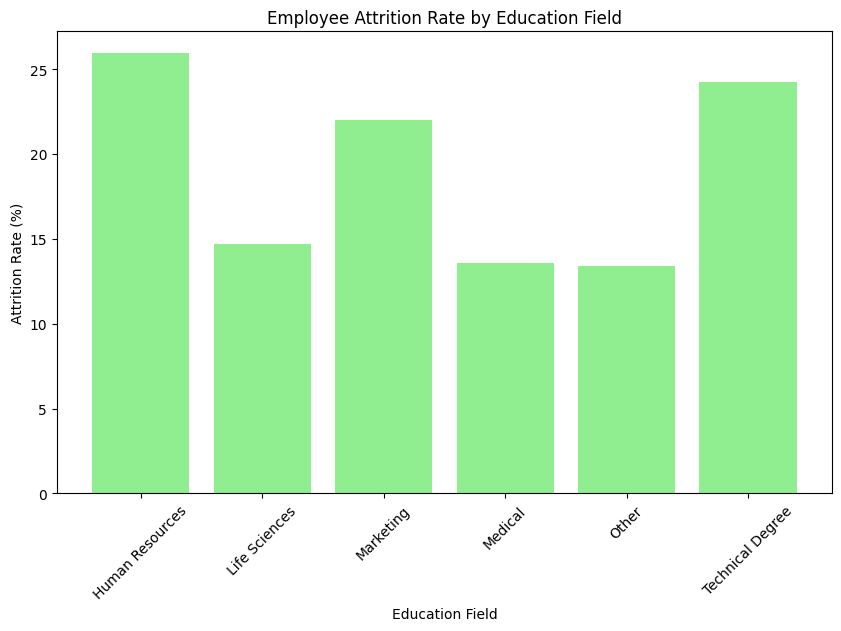

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assume IBMDATA is your DataFrame
# Group by EducationField and calculate attrition rates
attrition_by_education = IBMDATA.groupby('EducationField').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_education['Attrition_Rate'] = (
    attrition_by_education['Employees_Left'] / attrition_by_education['Total_Employees']
) * 100

# Display the results
print(attrition_by_education[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_education.index, attrition_by_education['Attrition_Rate'], color='lightgreen')
plt.title('Employee Attrition Rate by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees in Human Resources (25.93%), Technical Degree (24.24%), and Marketing (22.01%) have the highest attrition rates, indicating areas for improvement. Medical (13.58%) and Other fields (13.41%) show better retention.

Focus on addressing concerns in the high-attrition fields to improve retention.

                           Total_Employees  Employees_Left  Attrition_Rate
JobRole                                                                   
Healthcare Representative              131               9        6.870229
Human Resources                         52              12       23.076923
Laboratory Technician                  259              62       23.938224
Manager                                102               5        4.901961
Manufacturing Director                 145              10        6.896552
Research Director                       80               2        2.500000
Research Scientist                     292              47       16.095890
Sales Executive                        326              57       17.484663
Sales Representative                    83              33       39.759036


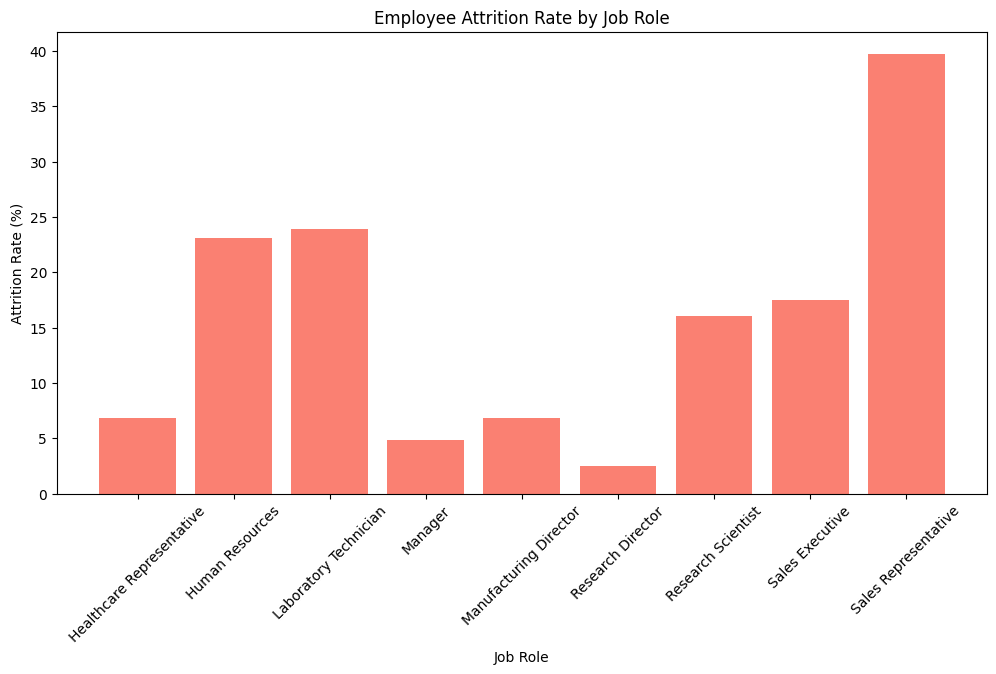

In [ ]:
# Assuming IBMDATA is your DataFrame with the 'JobRole' and 'Attrition' columns
# Group by Job Role and calculate attrition rates
attrition_by_job_role = IBMDATA.groupby('JobRole').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_job_role['Attrition_Rate'] = (
    attrition_by_job_role['Employees_Left'] / attrition_by_job_role['Total_Employees']
) * 100

# Display the results
print(attrition_by_job_role[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(attrition_by_job_role.index, attrition_by_job_role['Attrition_Rate'], color='salmon')
plt.title('Employee Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The Sales Representative role has the highest attrition rate at 39.76%, indicating significant turnover.

Human Resources also shows a high attrition rate of 23.08%, which may require attention.

In contrast, stable roles like Research Director and Manager have low attrition rates of 2.50% and 4.90%.


High turnover among Laboratory Technicians (23.94%) suggests potential issues with job satisfaction or workplace conditions.

               Total_Employees  Employees_Left  Attrition_Rate
MaritalStatus                                                 
Divorced                   327              33       10.091743
Married                    673              84       12.481426
Single                     470             120       25.531915


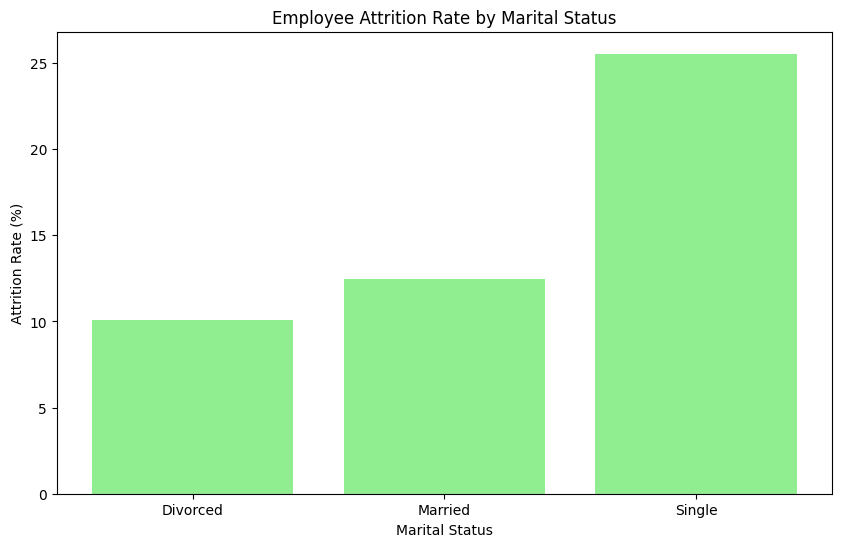

In [ ]:
# Group by Marital Status and calculate attrition rates
attrition_by_marital_status = IBMDATA.groupby('MaritalStatus').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_marital_status['Attrition_Rate'] = (
    attrition_by_marital_status['Employees_Left'] / attrition_by_marital_status['Total_Employees']
) * 100

# Display the results
print(attrition_by_marital_status[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_marital_status.index, attrition_by_marital_status['Attrition_Rate'], color='lightgreen')
plt.title('Employee Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_marital_status.index)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

Single employees have the highest attrition rate at 25.53%, indicating potential challenges in engagement or job satisfaction.

 In contrast, married employees have a lower attrition rate of 12.48%, while divorced employees exhibit a moderate rate of 10.09%.

                 Total_Employees  Employees_Left  Attrition_Rate
Distance_Binned                                                 
0-2                          208              26       12.500000
3-5                          359              51       14.206128
6-10                         373              56       15.013405
11-20                        301              55       18.272425
21-30                        229              49       21.397380


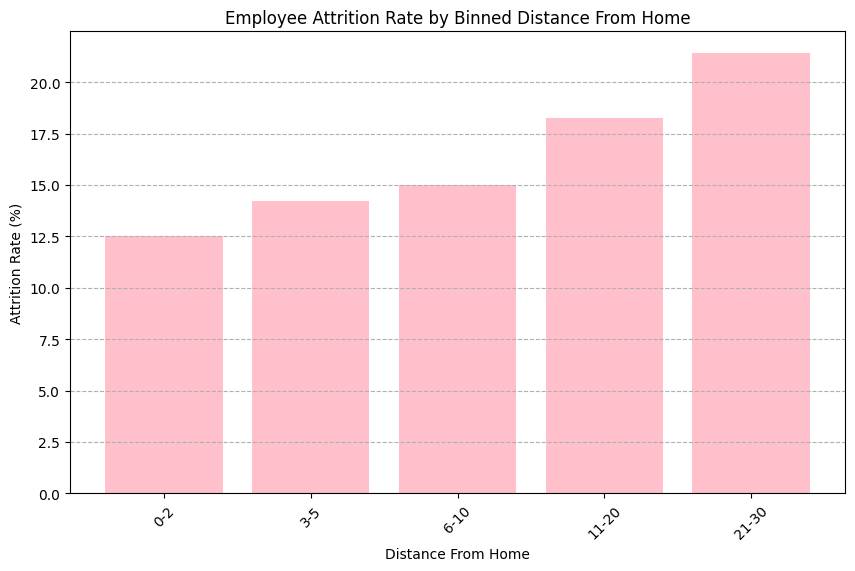

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assume IBMDATA is your DataFrame
# Define the bin edges and labels for DistanceFromHome
bins = [0, 2, 5, 10, 20, 30]  # Define your bins
labels = ['0-2', '3-5', '6-10', '11-20', '21-30']  # Labels for the bins

# Create a new column for binned DistanceFromHome
IBMDATA['Distance_Binned'] = pd.cut(IBMDATA['DistanceFromHome'], bins=bins, labels=labels, right=False)

# Group by the binned Distance and calculate attrition rates
attrition_by_distance_binned = IBMDATA.groupby('Distance_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_distance_binned['Attrition_Rate'] = (
    attrition_by_distance_binned['Employees_Left'] / attrition_by_distance_binned['Total_Employees']
) * 100

# Display the results
print(attrition_by_distance_binned[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_distance_binned.index, attrition_by_distance_binned['Attrition_Rate'], color='pink')
plt.title('Employee Attrition Rate by Binned Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The attrition rate increases with distance from home, peaking at 21.40% for employees living 21-30 miles away. Employees residing within 0-2 miles show a lower attrition rate of 12.50%, indicating that proximity positively influences retention.

Addressing the high rates in longer commutes could enhance employee satisfaction and retention.

<ipython-input-12-75feb7ff07a9>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_hourly_rate = IBMDATA.groupby('HourlyRate_Binned').agg(


                   Total_Employees  Employees_Left  Attrition_Rate
HourlyRate_Binned                                                 
0-30                             0               0             NaN
31-50                          393              59       15.012723
51-70                          408              75       18.382353
71-90                          431              66       15.313225
91-110                         238              37       15.546218


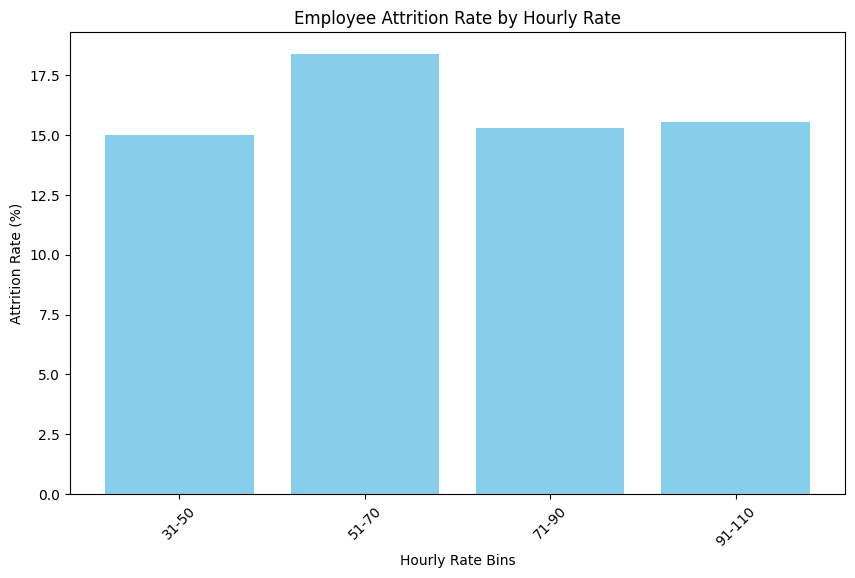

In [ ]:
bins = [0, 30, 50, 70, 90, 110]
labels = ['0-30', '31-50', '51-70', '71-90', '91-110']

# Categorizing the HourlyRate into bins
IBMDATA['HourlyRate_Binned'] = pd.cut(IBMDATA['HourlyRate'], bins=bins, labels=labels, right=False)

# Group by the binned hourly rates and calculate attrition rates
attrition_by_hourly_rate = IBMDATA.groupby('HourlyRate_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_hourly_rate['Attrition_Rate'] = (
    attrition_by_hourly_rate['Employees_Left'] / attrition_by_hourly_rate['Total_Employees']
) * 100

# Display the results
print(attrition_by_hourly_rate[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_hourly_rate.index, attrition_by_hourly_rate['Attrition_Rate'], color='skyblue')
plt.title('Employee Attrition Rate by Hourly Rate')
plt.xlabel('Hourly Rate Bins')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

The 0-30 hourly rate bin has no employees, indicating a focus on higher-skilled positions. The 51-70 range has the highest attrition rate (18.38%), suggesting potential dissatisfaction among those earning within this bracket.

Attrition rates remain consistent (around 15%) for hourly rates 31-50, 71-90, and 91-110, indicating stable retention among higher earners.


This variation highlights the need for further investigation into pay-related issues, particularly in the 51-70 range.

                Total_Employees  Employees_Left  Attrition_Rate
JobInvolvement                                                 
1                            83              28       33.734940
2                           375              71       18.933333
3                           868             125       14.400922
4                           144              13        9.027778


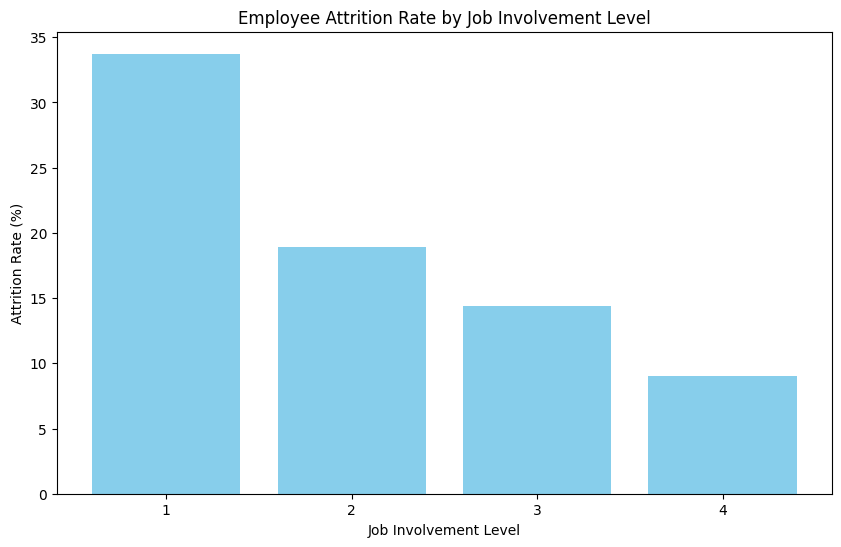

In [ ]:
# Group by Job Involvement and calculate attrition rates
attrition_by_job_involvement = IBMDATA.groupby('JobInvolvement').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_job_involvement['Attrition_Rate'] = (
    attrition_by_job_involvement['Employees_Left'] / attrition_by_job_involvement['Total_Employees']
) * 100

# Display the results
print(attrition_by_job_involvement[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_job_involvement.index, attrition_by_job_involvement['Attrition_Rate'], color='skyblue')
plt.title('Employee Attrition Rate by Job Involvement Level')
plt.xlabel('Job Involvement Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_job_involvement.index)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

The highest attrition rate (33.73%) is found in Job Involvement level 1, indicating significant dissatisfaction.

Attrition decreases with increased job involvement, with level 4 showing the lowest rate (9.03%).

This trend highlights the need for enhanced engagement initiatives to improve retention, particularly for lower involvement levels.

          Total_Employees  Employees_Left  Attrition_Rate
JobLevel                                                 
1                     543             143       26.335175
2                     534              52        9.737828
3                     218              32       14.678899
4                     106               5        4.716981
5                      69               5        7.246377


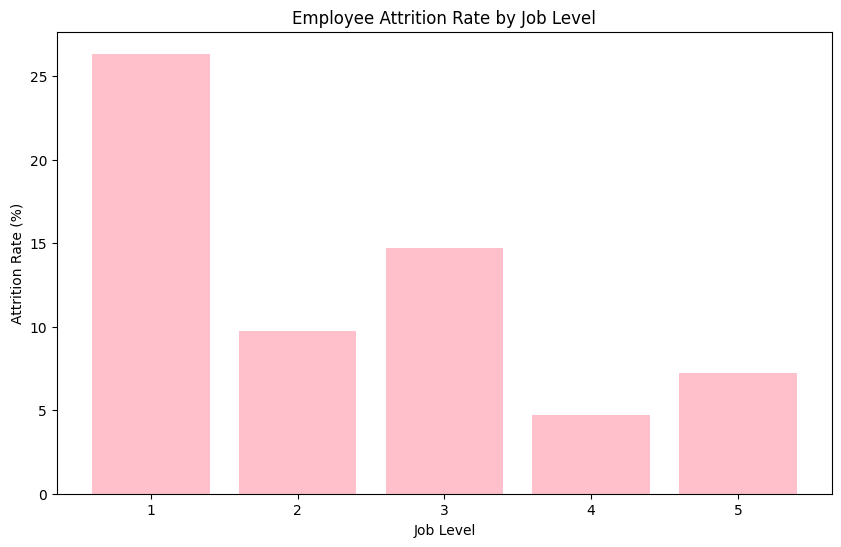

In [ ]:
# Group by Job Level and calculate attrition rates
attrition_by_job_level = IBMDATA.groupby('JobLevel').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_job_level['Attrition_Rate'] = (
    attrition_by_job_level['Employees_Left'] / attrition_by_job_level['Total_Employees']
) * 100

# Display the results
print(attrition_by_job_level[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_job_level.index, attrition_by_job_level['Attrition_Rate'], color='pink')
plt.title('Employee Attrition Rate by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_job_level.index)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

The highest attrition rate (26.34%) is in Job Level 1, indicating significant dissatisfaction among entry-level employees, while Job Level 4 shows the lowest rate (4.72%).

 Focus on improving support and engagement for lower job levels through targeted training, mentorship, and career development opportunities to enhance retention.

                 Total_Employees  Employees_Left  Attrition_Rate
JobSatisfaction                                                 
1                            289              66       22.837370
2                            280              46       16.428571
3                            442              73       16.515837
4                            459              52       11.328976


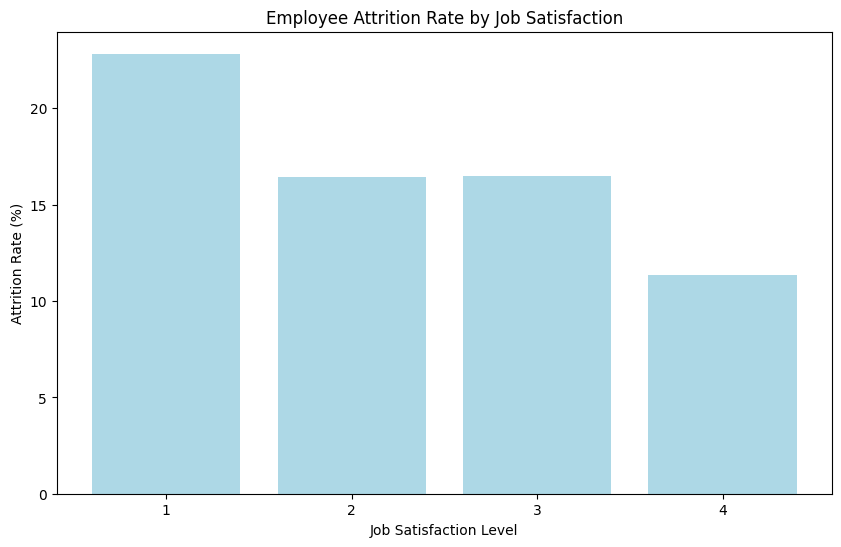

In [ ]:
# Group by Job Satisfaction and calculate attrition rates
attrition_by_job_satisfaction = IBMDATA.groupby('JobSatisfaction').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_job_satisfaction['Attrition_Rate'] = (
    attrition_by_job_satisfaction['Employees_Left'] / attrition_by_job_satisfaction['Total_Employees']
) * 100

# Display the results
print(attrition_by_job_satisfaction[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_job_satisfaction.index, attrition_by_job_satisfaction['Attrition_Rate'], color='lightblue')
plt.title('Employee Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_job_satisfaction.index)
plt.show()



<font face="Times New Roman" color="RED">**INSIGHT**</font>

The highest attrition rate (22.84%) is among employees with Job Satisfaction level 1, indicating significant dissatisfaction.

Attrition rates decrease progressively with higher satisfaction levels, with level 4 showing the lowest rate (11.33%).

This trend underscores the importance of addressing employee satisfaction to enhance retention across all levels

                    Total_Employees  Employees_Left  Attrition_Rate
NumCompaniesWorked                                                 
0                               197              23       11.675127
1                               521              98       18.809981
2                               146              16       10.958904
3                               159              16       10.062893
4                               139              17       12.230216
5                                63              16       25.396825
6                                70              16       22.857143
7                                74              17       22.972973
8                                49               6       12.244898
9                                52              12       23.076923


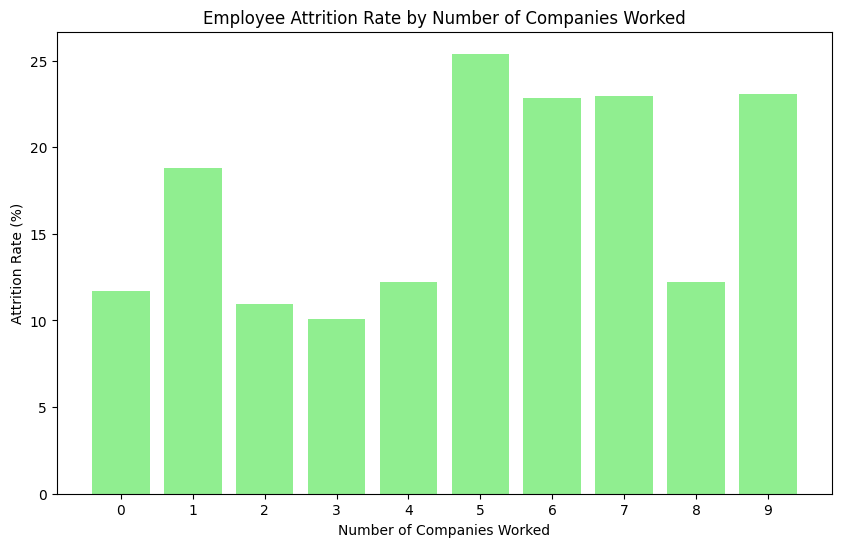

In [ ]:
# Group by NumCompaniesWorked and calculate attrition rates
attrition_by_num_companies = IBMDATA.groupby('NumCompaniesWorked').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_num_companies['Attrition_Rate'] = (
    attrition_by_num_companies['Employees_Left'] / attrition_by_num_companies['Total_Employees']
) * 100

# Display the results
print(attrition_by_num_companies[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_num_companies.index, attrition_by_num_companies['Attrition_Rate'], color='lightgreen')
plt.title('Employee Attrition Rate by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_num_companies.index)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with a history of working for 5 companies exhibit the highest attrition rate at 25.40%, suggesting frequent job changes may indicate dissatisfaction. Conversely, those with 0 to 2 companies show lower attrition rates, implying stability correlates with satisfaction.

The analysis reveals that employees with a history of working at more companies exhibit higher attrition rates, particularly those who have worked at five or more companies

<ipython-input-22-fc0a75910e4e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_salary_hike = IBMDATA.groupby('SalaryHike_Binned').agg(


                   Total_Employees  Employees_Left  Attrition_Rate
SalaryHike_Binned                                                 
0-10                             0               0             NaN
11-15                          818             132       16.136919
16-20                          426              68       15.962441
21-25                          208              36       17.307692
26-30                           18               1        5.555556


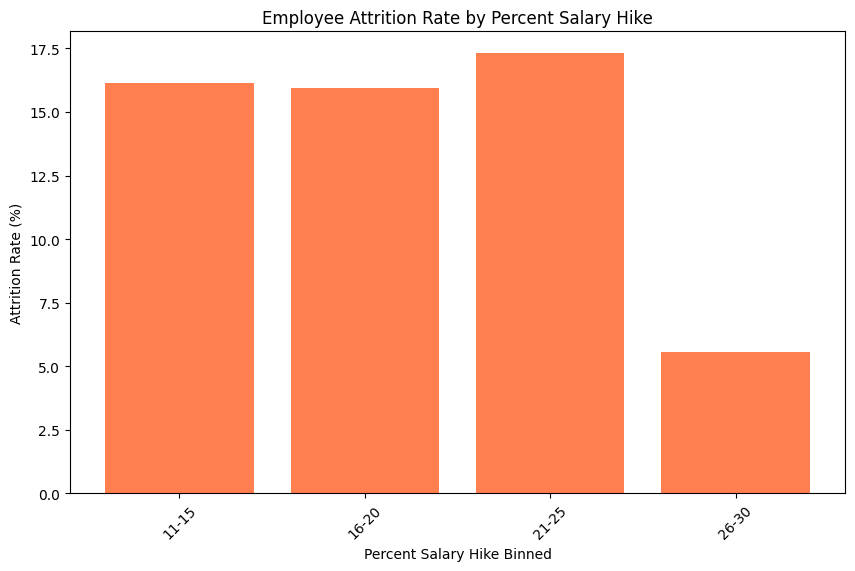

In [ ]:
# Create bins for PercentSalaryHike
bins = [0, 10, 15, 20, 25, 30]  # You can adjust the bin edges as needed
labels = ['0-10', '11-15', '16-20', '21-25', '26-30']
IBMDATA['SalaryHike_Binned'] = pd.cut(IBMDATA['PercentSalaryHike'], bins=bins, labels=labels, right=False)

# Group by SalaryHike_Binned and calculate attrition rates
attrition_by_salary_hike = IBMDATA.groupby('SalaryHike_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_salary_hike['Attrition_Rate'] = (
    attrition_by_salary_hike['Employees_Left'] / attrition_by_salary_hike['Total_Employees']
) * 100

# Display the results
print(attrition_by_salary_hike[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_salary_hike.index, attrition_by_salary_hike['Attrition_Rate'], color='coral')
plt.title('Employee Attrition Rate by Percent Salary Hike')
plt.xlabel('Percent Salary Hike Binned')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>


The binned salary hike data indicates that attrition rates are higher in the 11-15% (16.14%) and 21-25% (17.31%) salary hike ranges, while the 26-30% range shows significantly lower attrition at 5.56%.

This suggests that employees receiving lower hikes may feel undervalued, leading to higher turnover.

To improve retention, consider reviewing salary hike policies and implementing targeted employee engagement strategies for those in the lower ranges.

                   Total_Employees  Employees_Left  Attrition_Rate
PerformanceRating                                                 
3                             1244             200       16.077170
4                              226              37       16.371681


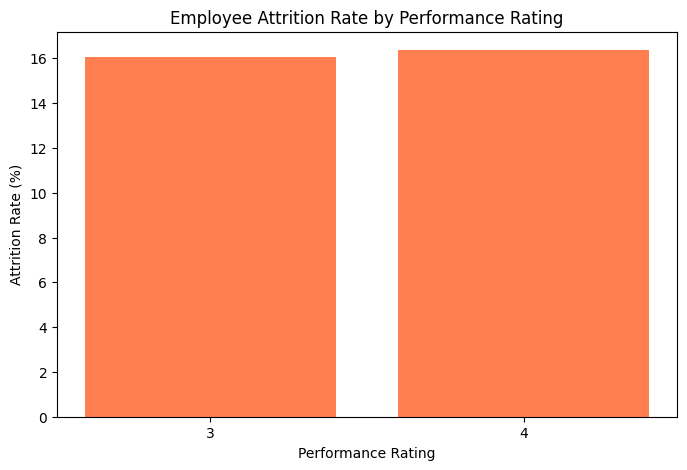

In [ ]:
attrition_by_performance = IBMDATA.groupby('PerformanceRating').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_performance['Attrition_Rate'] = (
    attrition_by_performance['Employees_Left'] / attrition_by_performance['Total_Employees']
) * 100

# Display the results
print(attrition_by_performance[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(attrition_by_performance.index, attrition_by_performance['Attrition_Rate'], color='coral')
plt.title('Employee Attrition Rate by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_performance.index)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

The attrition rates for employees with Performance Rating 3 and 4 are similar, at approximately 16.08% and 16.37%, respectively.

This indicates that higher performance ratings do not significantly correlate with lower attrition rates.

Companies should focus on understanding the underlying factors driving attrition across performance levels to implement effective retention strategies.

                          Total_Employees  Employees_Left  Attrition_Rate
RelationshipSatisfaction                                                 
1                                     276              57       20.652174
2                                     303              45       14.851485
3                                     459              71       15.468410
4                                     432              64       14.814815


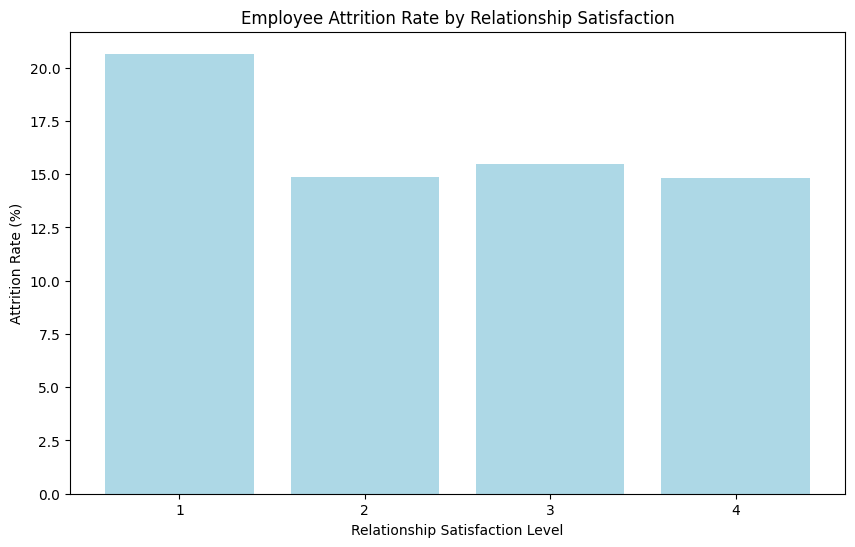

In [ ]:
# Group by Relationship Satisfaction and calculate attrition rates
attrition_by_relationship_satisfaction = IBMDATA.groupby('RelationshipSatisfaction').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_relationship_satisfaction['Attrition_Rate'] = (
    attrition_by_relationship_satisfaction['Employees_Left'] / attrition_by_relationship_satisfaction['Total_Employees']
) * 100

# Display the results
print(attrition_by_relationship_satisfaction[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_relationship_satisfaction.index, attrition_by_relationship_satisfaction['Attrition_Rate'], color='lightblue')
plt.title('Employee Attrition Rate by Relationship Satisfaction')
plt.xlabel('Relationship Satisfaction Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_relationship_satisfaction.index)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>


Employees with a Relationship Satisfaction rating of 1 have the highest attrition rate at approximately 20.65%, indicating that poor relationships significantly contribute to turnover.

In contrast, higher satisfaction ratings (3 and 4) show lower attrition rates, suggesting a positive correlation between relationship satisfaction and employee retention.

Companies should implement initiatives to enhance workplace relationships to decrease attrition and improve overall employee engagement.

<ipython-input-26-d1c40d036370>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_working_years = IBMDATA.groupby('WorkingYears_Binned').agg(


                     Total_Employees  Employees_Left  Attrition_Rate
WorkingYears_Binned                                                 
0-5                              228              75       32.894737
6-10                             493              82       16.632860
11-15                            353              44       12.464589
16-20                            159              18       11.320755
21-25                            125              10        8.000000
26-30                             59               3        5.084746
31-35                             37               3        8.108108
36-40                             14               0        0.000000


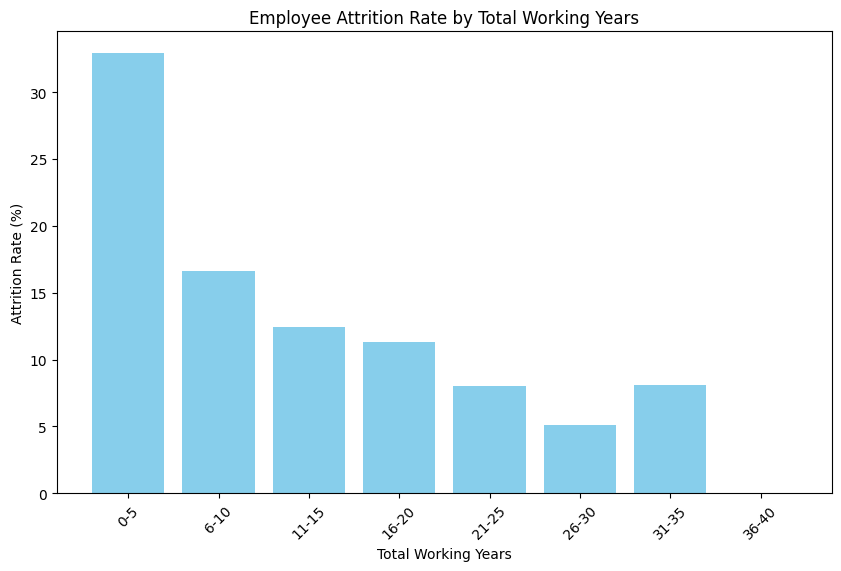

In [ ]:
# Step 1: Create bins for TotalWorkingYears
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40']
IBMDATA['WorkingYears_Binned'] = pd.cut(IBMDATA['TotalWorkingYears'], bins=bins, labels=labels, right=False)

# Step 2: Group by the binned TotalWorkingYears and calculate attrition rates
attrition_by_working_years = IBMDATA.groupby('WorkingYears_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_working_years['Attrition_Rate'] = (attrition_by_working_years['Employees_Left'] / attrition_by_working_years['Total_Employees']) * 100

# Display the results
print(attrition_by_working_years[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_working_years.index, attrition_by_working_years['Attrition_Rate'], color='skyblue')
plt.title('Employee Attrition Rate by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with 0-5 years of experience show a high attrition rate of 32.89%, indicating potential challenges in retention for newer hires.

 As experience increases, attrition rates decline significantly, reaching as low as 0% for those with over 36 years of tenure. This trend suggests that job satisfaction improves with experience.

 To enhance retention, organizations should focus on mentorship and career development initiatives for early-career employees.

                       Total_Employees  Employees_Left  Attrition_Rate
TrainingTimesLastYear                                                 
0                                   54              15       27.777778
1                                   71               9       12.676056
2                                  547              98       17.915905
3                                  491              69       14.052953
4                                  123              26       21.138211
5                                  119              14       11.764706
6                                   65               6        9.230769


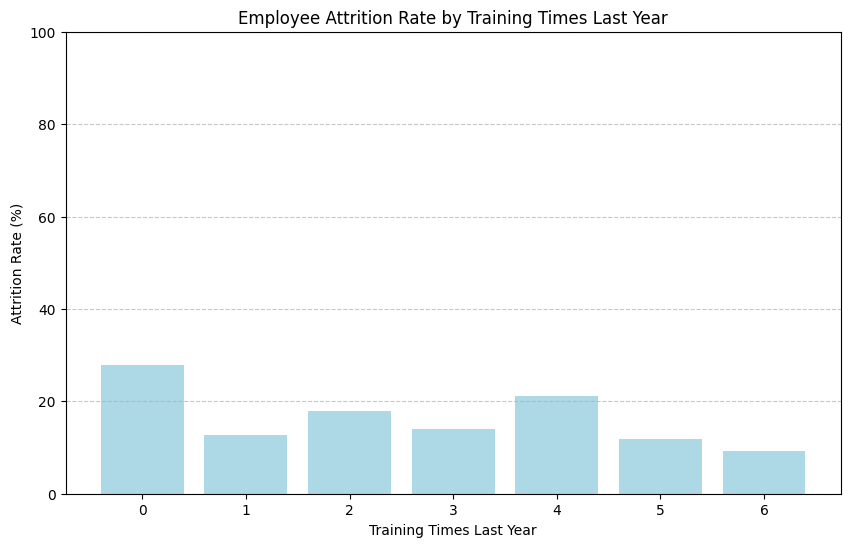

In [ ]:
# Group by TrainingTimesLastYear and calculate attrition rates
attrition_by_training = IBMDATA.groupby('TrainingTimesLastYear').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_training['Attrition_Rate'] = (
    attrition_by_training['Employees_Left'] / attrition_by_training['Total_Employees']
) * 100

# Display the results
print(attrition_by_training[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_training.index, attrition_by_training['Attrition_Rate'], color='lightblue')
plt.title('Employee Attrition Rate by Training Times Last Year')
plt.xlabel('Training Times Last Year')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_training.index)
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<font face="Times New Roman" color="RED">**INSIGHT**</font>

The analysis of attrition by "TrainingTimesLastYear" indicates that employees who received no training had the highest attrition rate at 27.78%.

In contrast, those attending six training sessions exhibited the lowest attrition rate at 9.23%.

 This trend suggests a correlation between training opportunities and employee retention.

 To improve retention, it is advisable for the organization to enhance its training programs.

                 Total_Employees  Employees_Left  Attrition_Rate
WorkLifeBalance                                                 
1                             80              25       31.250000
2                            344              58       16.860465
3                            893             127       14.221725
4                            153              27       17.647059


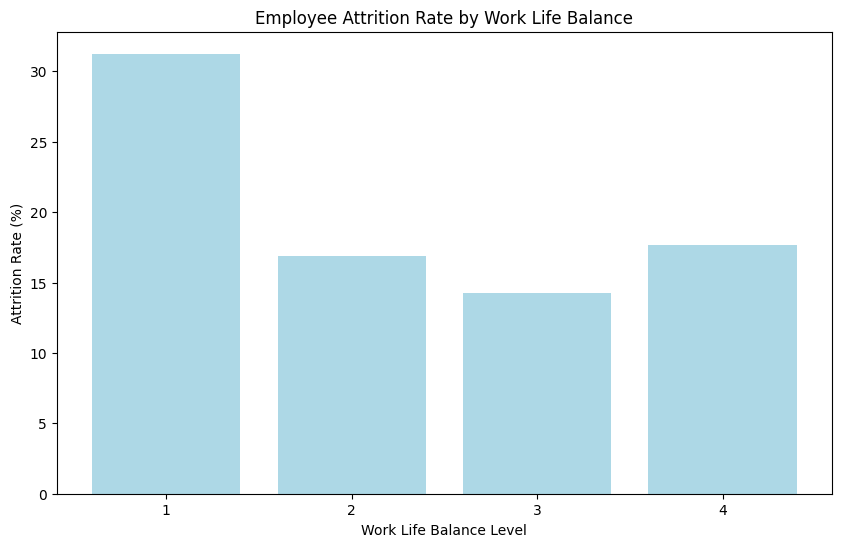

In [ ]:
# Group by WorkLifeBalance and calculate attrition rates
attrition_by_work_life_balance = IBMDATA.groupby('WorkLifeBalance').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_work_life_balance['Attrition_Rate'] = (
    attrition_by_work_life_balance['Employees_Left'] / attrition_by_work_life_balance['Total_Employees']
) * 100

# Display the results
print(attrition_by_work_life_balance[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_work_life_balance.index, attrition_by_work_life_balance['Attrition_Rate'], color='lightblue')
plt.title('Employee Attrition Rate by Work Life Balance')
plt.xlabel('Work Life Balance Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(attrition_by_work_life_balance.index)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with a work-life balance rating of 1 experience the highest attrition rate at 31.25%, indicating a strong correlation between poor work-life balance and turnover.

Ratings of 2, 3, and 4 show lower attrition rates, suggesting that improved work-life balance reduces employee departures.

Organizations should prioritize initiatives that enhance work-life balance, such as flexible hours and wellness programs, to mitigate attrition. Regular assessments and employee feedback can guide these improvements effectively.

In [ ]:
# Create bins
bins = [0, 5, 10, 15, 20, 25, 30, np.inf]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']
IBMDATA['YearsAtCompany_Binned'] = pd.cut(IBMDATA['YearsAtCompany'], bins=bins, labels=labels, right=False)

# Group by the binned years and calculate attrition rates
attrition_by_years = IBMDATA.groupby('YearsAtCompany_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_years['Attrition_Rate'] = (
    attrition_by_years['Employees_Left'] / attrition_by_years['Total_Employees']
) * 100

# Display the results
print(attrition_by_years[['Total_Employees', 'Employees_Left', 'Attrition_Rate']])

                       Total_Employees  Employees_Left  Attrition_Rate
YearsAtCompany_Binned                                                 
0-5                                580             141       24.310345
6-10                               524              58       11.068702
11-15                              208              24       11.538462
16-20                               65               5        7.692308
21-25                               64               5        7.812500
26-30                               12               0        0.000000
31+                                 17               4       23.529412


<ipython-input-42-fca2129b1492>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_years = IBMDATA.groupby('YearsAtCompany_Binned').agg(


<ipython-input-43-ba586b8ffe6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_years.index, y='Attrition_Rate', data=attrition_by_years, palette='viridis')


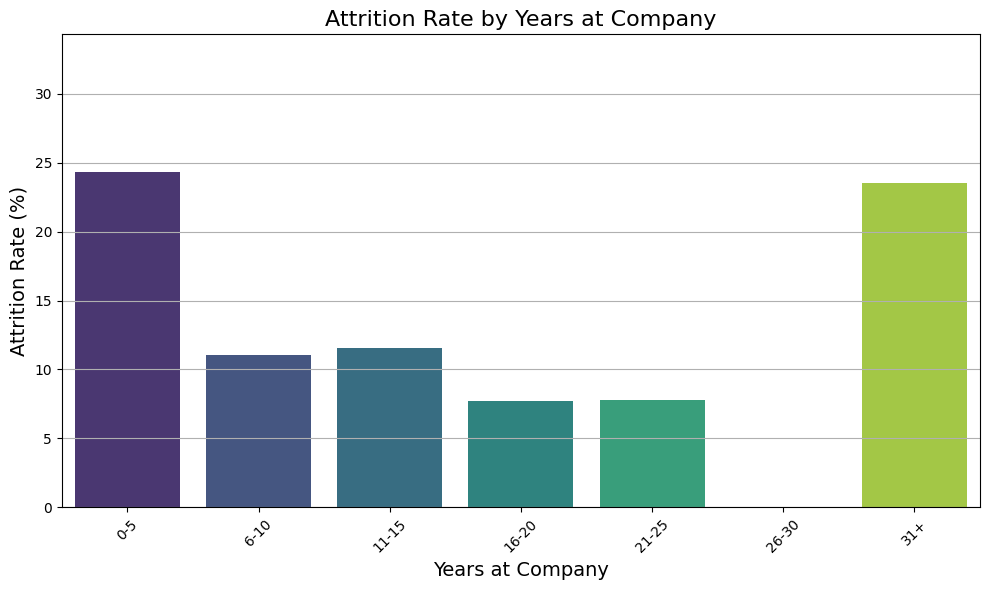

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_years.index, y='Attrition_Rate', data=attrition_by_years, palette='viridis')
plt.title('Attrition Rate by Years at Company', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, attrition_by_years['Attrition_Rate'].max() + 10)  # Add some padding above the max value
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with less than 6 years at the company have a high attrition rate of 24.31%, indicating possible dissatisfaction.

In contrast, those with 6-10 years have a significantly lower attrition rate of 11.07%.

The organization should enhance engagement and career development programs for newer employees to reduce turnover.

<ipython-input-48-7474114d8ec1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_years_in_role = IBMDATA.groupby('YearsInCurrentRole_Binned').agg(


                           Total_Employees  Employees_Left  Attrition_Rate
YearsInCurrentRole_Binned                                                 
0-2                                    301              84       27.906977
3-5                                    611              99       16.202946
6-10                                   451              47       10.421286
11-15                                   86               5        5.813953
16+                                     21               2        9.523810


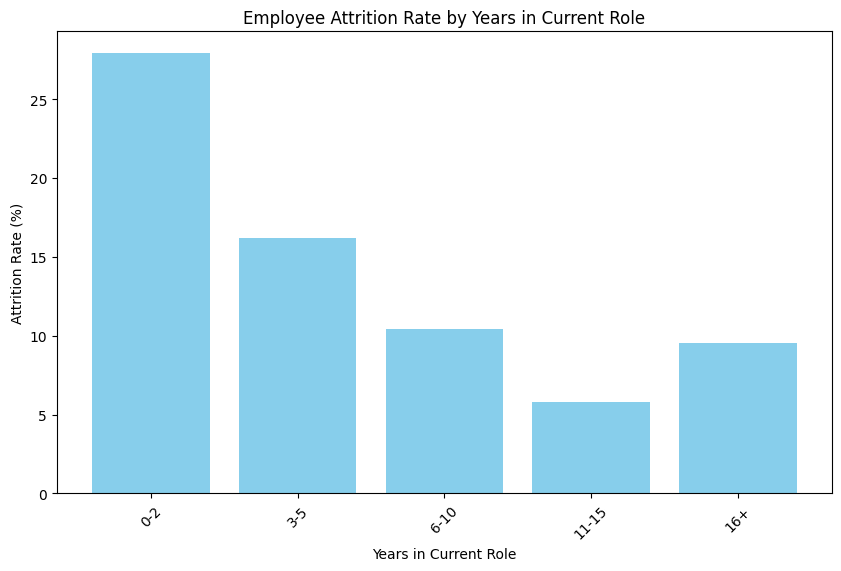

In [ ]:
bins = [0, 2, 5, 10, 15, 20]
labels = ['0-2', '3-5', '6-10', '11-15', '16+']
IBMDATA['YearsInCurrentRole_Binned'] = pd.cut(IBMDATA['YearsInCurrentRole'], bins=bins, labels=labels, right=False)

# Calculate attrition rates
attrition_by_years_in_role = IBMDATA.groupby('YearsInCurrentRole_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum())
)

# Calculate attrition rate percentage
attrition_by_years_in_role['Attrition_Rate'] = (
    attrition_by_years_in_role['Employees_Left'] / attrition_by_years_in_role['Total_Employees']
) * 100

# Display the results
print(attrition_by_years_in_role)

# Plotting the results in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(attrition_by_years_in_role.index, attrition_by_years_in_role['Attrition_Rate'], color='skyblue')
plt.title('Employee Attrition Rate by Years in Current Role')
plt.xlabel('Years in Current Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

Employees with 0-2 years in their current role exhibit the highest attrition rate at 27.91%, indicating potential dissatisfaction or challenges in acclimating.

In contrast, those with 6-10 years show a significantly lower rate of 10.42%, suggesting that job stability enhances retention.

To improve overall retention, focus on enhancing support and engagement for new employees to facilitate their integration and satisfaction.

<ipython-input-54-7f9de9bbf99f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_summary = IBMDATA.groupby('YearsWithCurrManager_Binned').agg(
<ipython-input-54-7f9de9bbf99f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_summary.index, y='Attrition_Rate', data=attrition_summary, palette='viridis')


                             Total_Employees  Employees_Left  Attrition_Rate
YearsWithCurrManager_Binned                                                 
0-2                                      339              96       28.318584
3-5                                      584              80       13.698630
6-10                                     447              55       12.304251
11+                                      100               6        6.000000


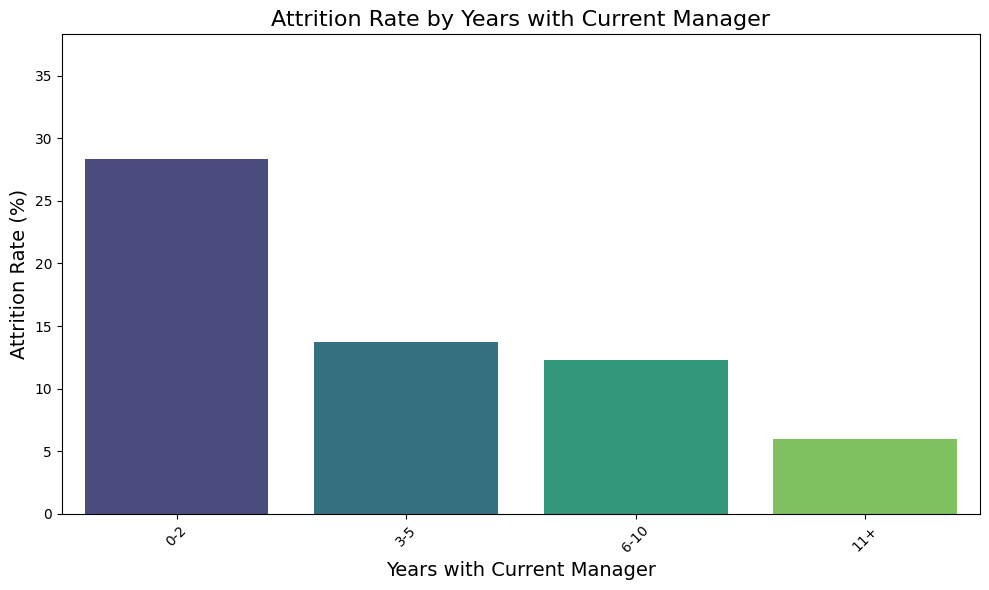

In [ ]:
bins = [0, 2, 5, 10, 20]  # Adjust the last bin as necessary
labels = ['0-2', '3-5', '6-10', '11+']
IBMDATA['YearsWithCurrManager_Binned'] = pd.cut(IBMDATA['YearsWithCurrManager'], bins=bins, labels=labels, right=False)

# Calculate total employees and those who left for each bin
attrition_summary = IBMDATA.groupby('YearsWithCurrManager_Binned').agg(
    Total_Employees=('Attrition', 'count'),
    Employees_Left=('Attrition', lambda x: (x == 'Yes').sum()))  # Replace with actual counts of employees left if available

# Calculate Attrition Rate
attrition_summary['Attrition_Rate'] = (attrition_summary['Employees_Left'] / attrition_summary['Total_Employees']) * 100

print(attrition_summary)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_summary.index, y='Attrition_Rate', data=attrition_summary, palette='viridis')

# Adding titles and labels
plt.title('Attrition Rate by Years with Current Manager', fontsize=16)
plt.xlabel('Years with Current Manager', fontsize=14)
plt.ylabel('Attrition Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, attrition_summary['Attrition_Rate'].max() + 10)  # Add a bit of space above the highest bar

# Show the plot
plt.tight_layout()
plt.show()

<font face="Times New Roman" color="RED">**INSIGHT**</font>

High attrition (28.32%) is prevalent among employees with 0-2 years under their current manager, suggesting early dissatisfaction.

Attrition decreases significantly with tenure, indicating improved retention over time


# **<font face="Algerian" color="blue">ENCODING CATEGORICAL AND SCALING NUMERICAL FEATURES</font>**








In [ ]:
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']
ctod=categorical_columns
IBMDATA_DD=IBMDATA_D.drop(columns=ctod)
IBMDATA_DD

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8



**<font face="TIMES NEW ROMAN" color="brown">SCALING</font>**








In [ ]:
# Apply Standardization (or normalization) only to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(IBMDATA_DD)

# Convert the scaled features back to a DataFrame

scaled_df = pd.DataFrame(scaled_features, columns=IBMDATA_DD.columns)


In [ ]:
scaled_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895



**<font face="TIMES NEW ROMAN" color="brown">ONE HOT ENCODING</font>**








In [ ]:
def encode_categorical_features(df, categorical_columns):
    # Initialize label encoder
    label_encoder = LabelEncoder()

    # Loop through specified categorical columns
    for column in categorical_columns:
        if column not in df.columns:
            print(f"Column '{column}' not found in DataFrame.")
            continue

        unique_values = df[column].nunique()

        if unique_values == 2:
            # Apply label encoding for binary features
            df[column] = label_encoder.fit_transform(df[column])
        elif unique_values > 2:
            # Apply one-hot encoding for features with more than two categories
            df = pd.get_dummies(df, columns=[column], drop_first=True)

    # Convert all boolean columns to integers (0 and 1)
    df = df.astype(int)

    return df

# Example usage with predefined categorical columns
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']  # Replace with your actual categorical column names
df_encoded = encode_categorical_features(IBMDATA_D, categorical_columns)

# Display the resulting DataFrame
df_encoded


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
numerical_columns = scaled_df.select_dtypes(include=['number']).columns
numerical_columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
ALL=df_encoded.drop(columns=numerical_columns)
ALL

,Attrition,Gender,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_encoded= pd.concat([scaled_df,ALL], axis=1)
df_encoded

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.254625,-1.224807,1.785511,-0.057788,1.153254,-0.835451,-0.284329,0.523316,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.868426,1.169781,-1.175601,-1.026167,0.845911,-1.567907,0.741140,1.004010,0.523316,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,-1.086676,-1.605183,-0.640727,0.085049,-0.660531,1.038693,1.785511,-0.057788,-0.660853,-0.076690,-1.284418,-0.678049,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,1.322365,0.546677,-0.887515,0.085049,1.169781,-0.142264,-1.026167,-0.057788,-0.660853,-0.236474,-0.150393,-0.277594,-0.330589,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0



# **<font face="Algerian" color="blue">FINDING CORRELATION BETWEEN THE FEATURES</font>**








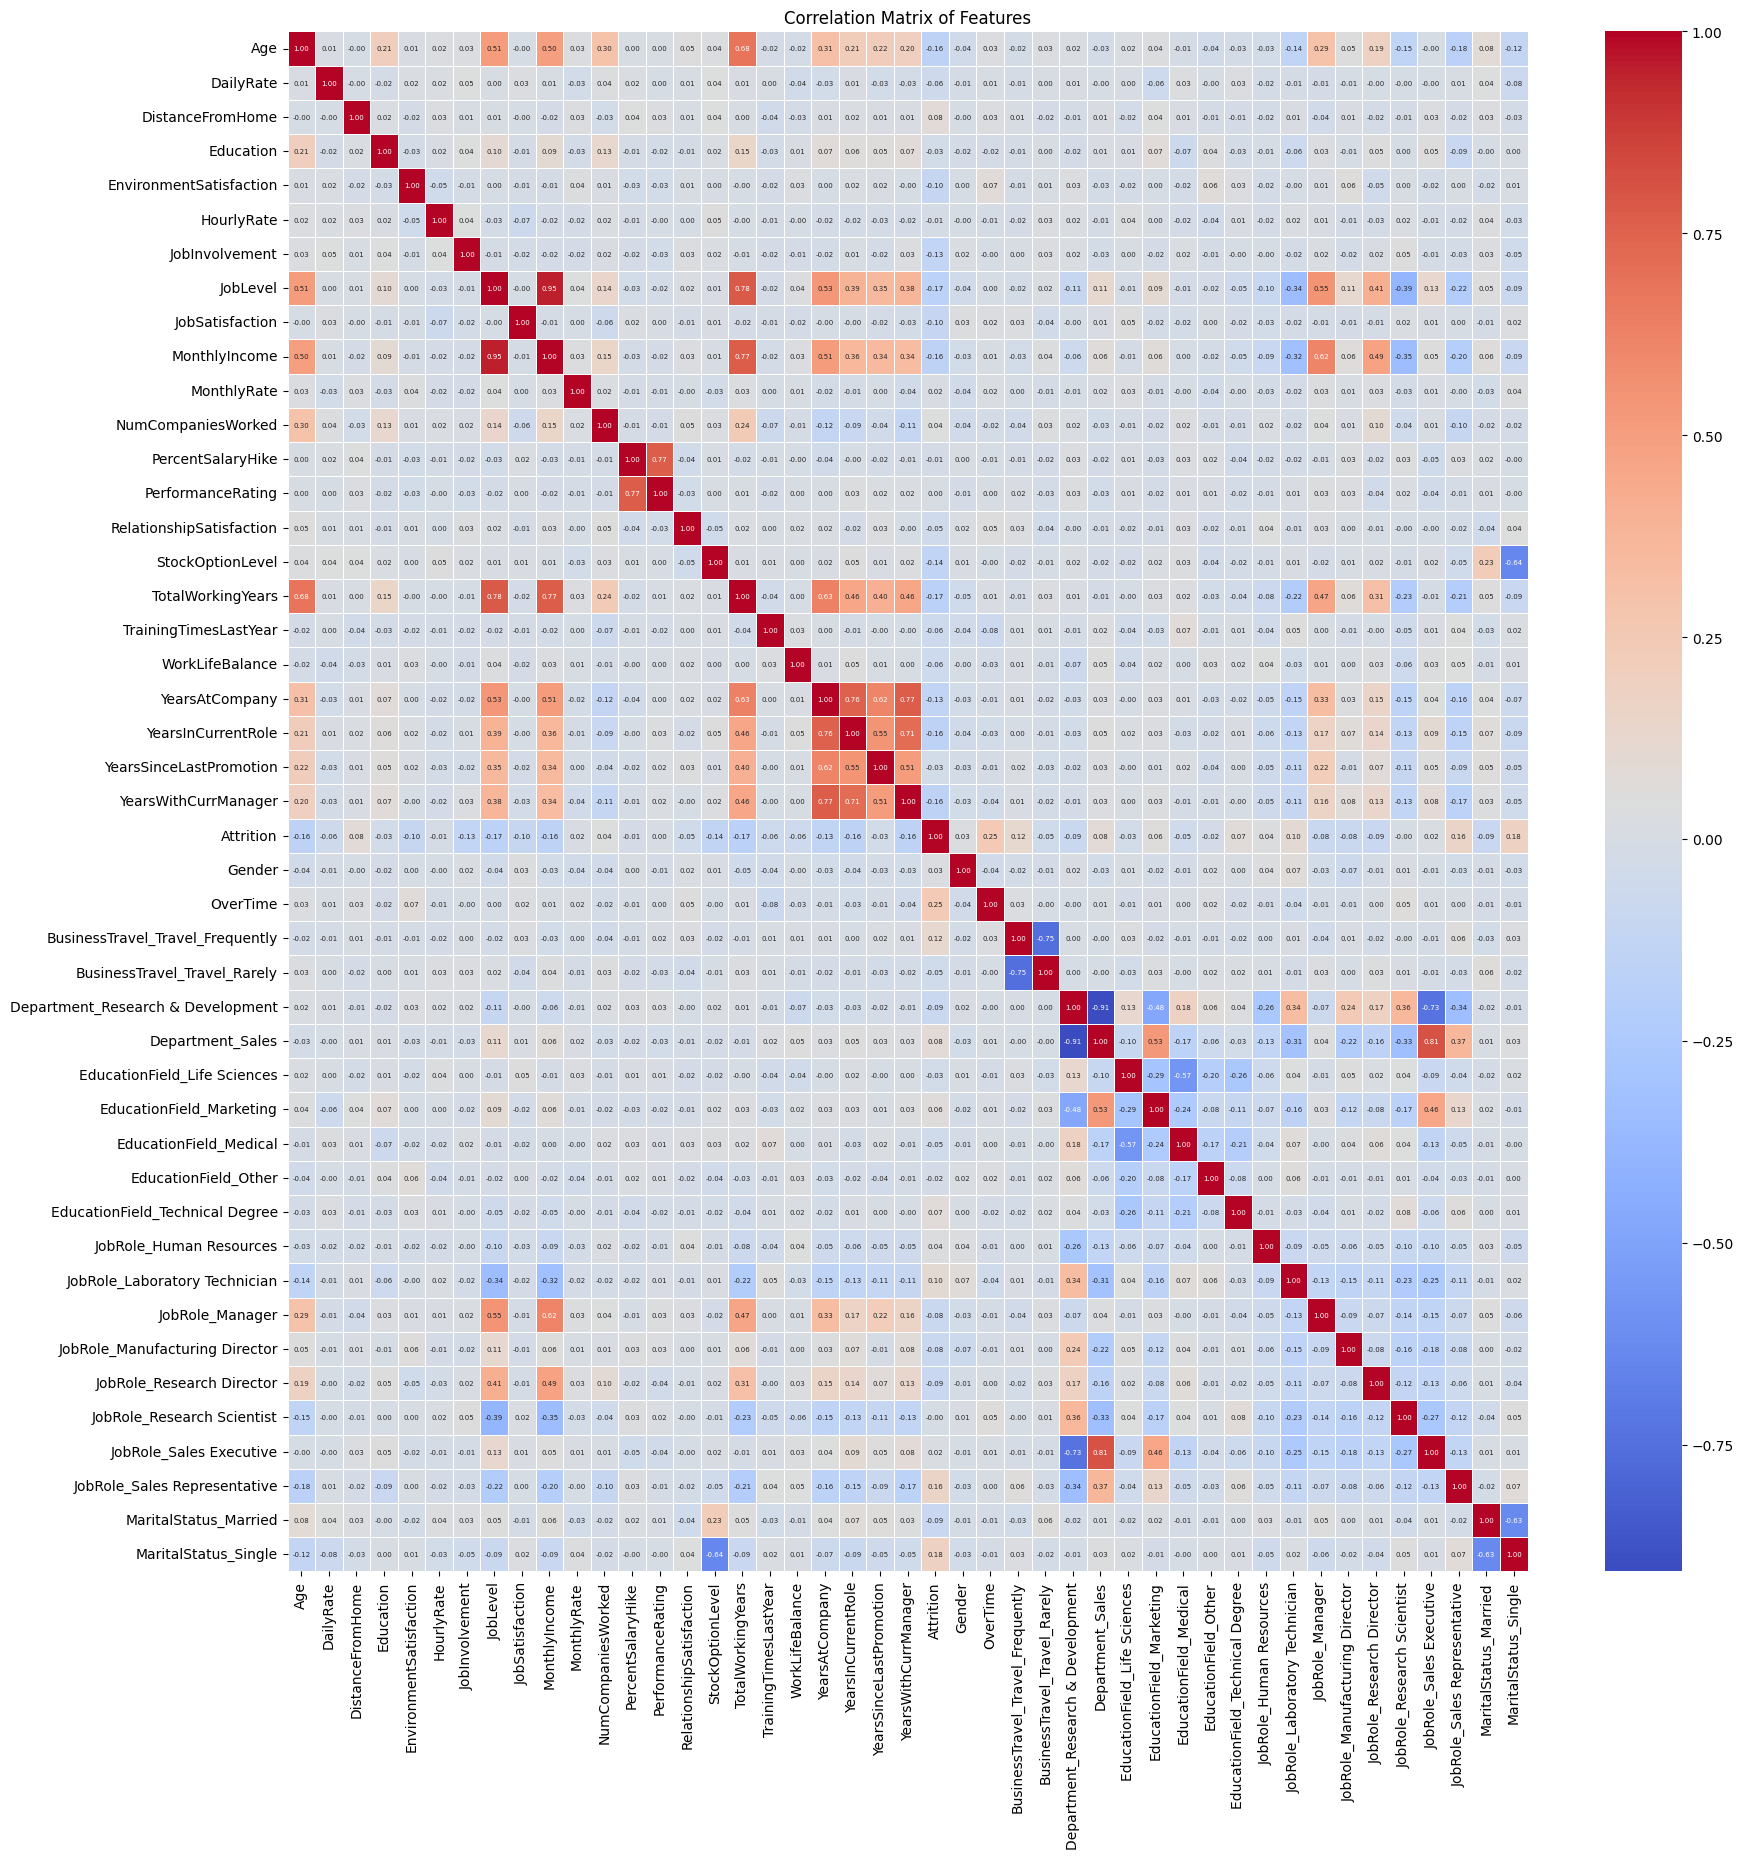

In [ ]:
# Generate the correlation matrix
corr_matrix = df_encoded.corr()

# Display the correlation matrix with improved readability
plt.figure(figsize=(20, 20))  # Increase figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 5}, fmt=".2f")  # Adjust annotation size and format
plt.title('Correlation Matrix of Features')
plt.show()



# **<font face="Algerian" color="blue">FINDING IMPORTANT FEATURES</font>**









**<font face="TIMES NEW ROMAN" color="bROWN">USING RANDOM FOREST</font>**









**<font face="TIMES NEW ROMAN" color="bROWN">USING SHAP( SHapley Additive exPlanations.)</font>**








In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.3 MB/s eta 0:00:00


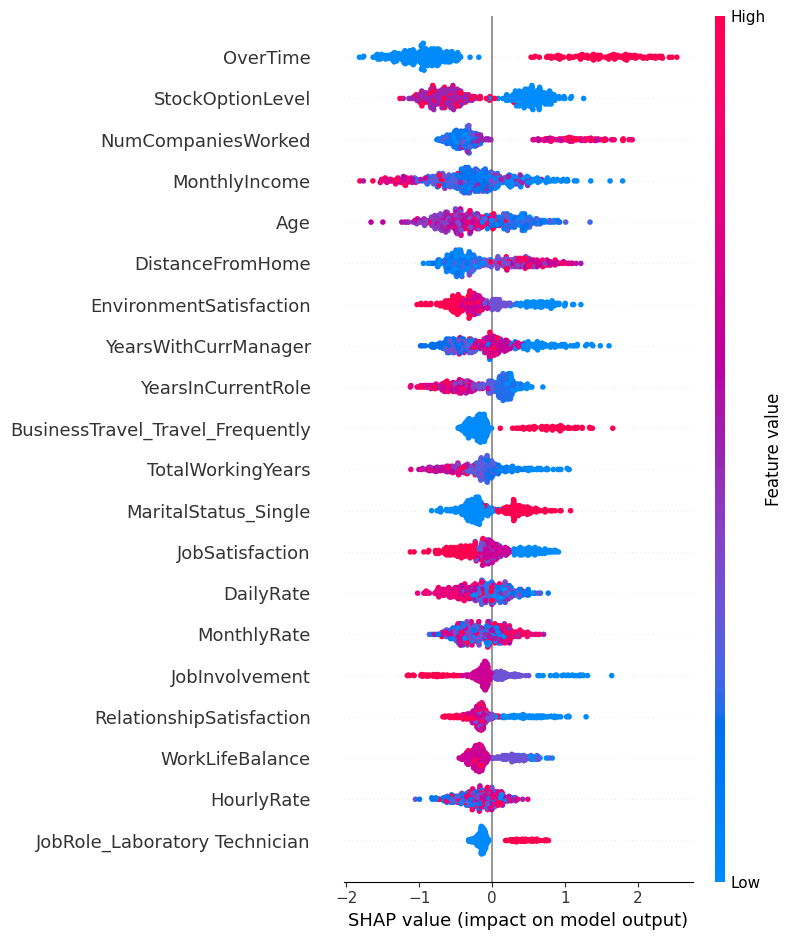

In [ ]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)



**<font face="TIMES NEW ROMAN" color="bROWN">USING XG BOOST</font>**









#**<font face="Algerian" color="blue">HANDLING IMBALANCED DATA</font>**







In [ ]:
IBMDATA['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


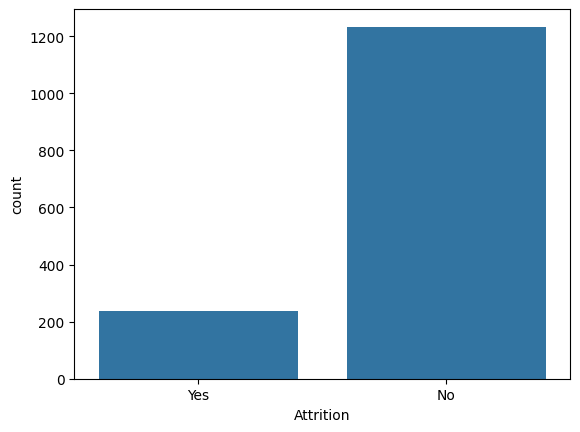

In [ ]:
sns.countplot(x="Attrition",data=IBMDATA)
plt.show()

In [ ]:
df_encoded['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237



# **<font face="TIMES NEW ROMAN" color="bROWN">APPLYING SMOTE(Synthetic Minority Over Sampling)</font>**








In [ ]:
# Separate features and target
X = df_encoded.drop(columns=['Attrition'])  # (exclude the target)
y = df_encoded['Attrition']  # (Attrition column)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Attrition'])

# Optionally, you can merge the resampled features and target back
resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Check the new class distribution
print(y_resampled_df['Attrition'].value_counts())

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [ ]:
resampled_data.shape

(2466, 45)

In [ ]:
X_train_resampled_data=resampled_data.drop(columns=['Attrition'])
Y_train_resampled_data=resampled_data['Attrition']

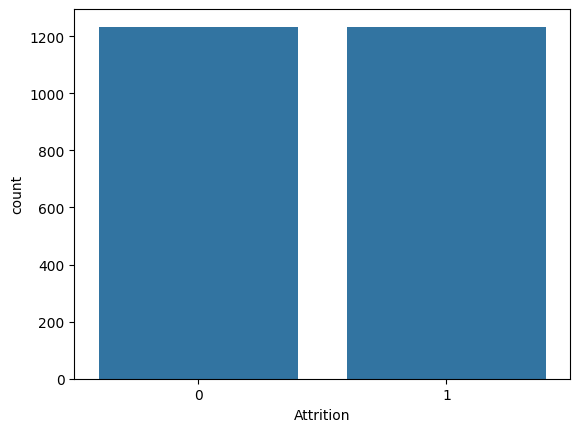

In [ ]:
sns.countplot(x="Attrition",data=resampled_data)
plt.show()


# **<font face="ALGERIAN" color="bROWN">SPLITTING DATASET</font>**








In [ ]:


# Assume df is your DataFrame and y is your target variable
df = pd.DataFrame(X_train_resampled_data, columns=X.columns)  # Replace with your feature DataFrame
y = pd.Series(Y_train_resampled_data, name='Attrition')       # Replace with your target Series

# Set a random_state for reproducibility
random_state = 7
shuffled_indices = np.random.RandomState(random_state).permutation(len(df))

# Shuffle the dataset
df_shuffled = df.iloc[shuffled_indices]
y_shuffled = y.iloc[shuffled_indices]

# Calculate the split index for 80:20 ratio
split_index = int(len(df) * 0.8)  # 80% for training

# Split the data
X_train = df_shuffled.iloc[:split_index]
X_test = df_shuffled.iloc[split_index:]
y_train = y_shuffled.iloc[:split_index]
y_test = y_shuffled.iloc[split_index:]

# Check the sizes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Optionally, check the distribution of the target variable
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Testing target distribution:\n{y_test.value_counts()}")


Training data shape: (1972, 44)
Testing data shape: (494, 44)
Training target distribution:
Attrition
1    988
0    984
Name: count, dtype: int64
Testing target distribution:
Attrition
0    249
1    245
Name: count, dtype: int64


In [ ]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1079,0.227347,0.710298,-0.393938,0.085049,-0.660531,-1.667666,0.379672,0.845911,-0.660853,0.397987,-0.725627,0.523316,0.762698,-0.426230,1.191438,-0.932014,-0.293077,0.155707,0.338096,-0.817734,-1.167687,-0.058285,-0.595227,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1326,-0.539166,-0.963096,-0.887515,1.061787,0.254625,0.792660,-1.026167,-0.057788,-0.660853,0.723292,1.668628,1.724681,-0.877232,-0.426230,0.266233,-0.932014,-0.550208,0.155707,-1.077862,-0.817734,-0.615492,-0.058285,-0.595227,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
794,-0.320163,-0.457359,-0.764121,-1.868426,-1.575686,-1.027981,0.379672,-0.057788,1.153254,0.266250,1.117708,-1.078504,0.489376,-0.426230,0.266233,-0.932014,-0.550208,-1.396086,-1.077862,-0.164613,-0.615492,-0.679146,-0.034520,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2413,0.665936,-0.673554,-0.014364,-0.366152,-1.152933,-0.490716,0.379672,0.428450,0.246200,0.434055,1.217920,0.769259,-0.771774,-0.426230,-1.086369,0.873664,0.794838,1.349077,0.338096,-0.754734,-0.785060,-0.535743,-0.767409,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
616,1.541369,1.278013,2.073946,1.061787,-1.575686,0.005356,0.379672,1.749610,0.246200,2.083155,-1.225391,-0.277594,-0.330589,-0.426230,0.266233,0.241988,2.278234,-0.620189,-1.077862,2.121310,0.488900,0.562576,3.610079,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-0.758170,0.065732,-1.010909,-1.868426,0.254625,1.087899,-1.026167,0.845911,0.246200,0.418810,0.929242,-0.678049,1.855984,2.346151,0.266233,-0.932014,0.092620,-0.620189,0.338096,0.651788,1.041095,0.873006,1.086895,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1603,0.438871,0.704537,-0.877791,1.056655,-0.655723,-0.443966,-2.424620,-0.961486,1.153254,-0.791927,0.480289,0.525420,-0.605347,-0.426230,0.256511,0.241988,-0.167213,-1.392009,-1.077862,-0.003906,0.756294,-0.370346,-1.151516,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
537,-1.086676,-1.260588,0.099639,-0.891688,1.169781,-1.667666,0.379672,0.845911,-1.567907,0.486591,-1.335716,-0.678049,1.582663,2.346151,0.266233,1.415991,-0.293077,0.931603,-1.077862,0.325228,0.764998,-0.368715,0.806541,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1220,-0.101159,-0.675520,-0.887515,1.061787,0.254625,-0.732742,0.379672,-0.057788,1.153254,-0.425155,-0.966093,0.122861,-0.057267,-0.426230,0.266233,-0.932014,0.735447,-0.620189,-1.077862,0.978348,0.764998,1.183437,0.806541,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1



# **<font face="Algerian" color="blue">MODEL BUILDING</font>**








In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Confusion matrix and metrics for training set
    print("TRAINING RESULTS: \n===============================")
    clf_report_train = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.3f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report_train}\n")

    # Confusion matrix and metrics for testing set
    print("TESTING RESULTS: \n===============================")
    clf_report_test = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.3f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report_test}\n")

    # Compute ROC AUC score for the test set (binary classification)
    if len(set(y_test)) == 2:  # Ensure binary classification
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score: {roc_auc:.2f}")

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc_value = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()




##**SUPPORT VECTOR MACHINE**

TRAINING RESULTS: 
CONFUSION MATRIX:
[[908  76]
 [143 845]]
ACCURACY SCORE:
0.889
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.863939    0.917481  0.888945     0.890710      0.890764
recall       0.922764    0.855263  0.888945     0.889014      0.888945
f1-score     0.892383    0.885280  0.888945     0.888832      0.888825
support    984.000000  988.000000  0.888945  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[229  20]
 [ 30 215]]
ACCURACY SCORE:
0.899
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884170    0.914894  0.898785    0.899532      0.899407
recall       0.919679    0.877551  0.898785    0.898615      0.898785
f1-score     0.901575    0.895833  0.898785    0.898704      0.898727
support    249.000000  245.000000  0.898785  494.000000    494.000000

ROC AUC Score: 0.95


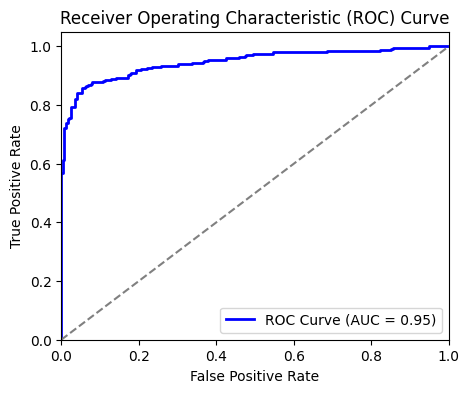

In [ ]:
svm_clf = SVC(kernel='linear',C=1,             # Using linear kernel
                tol=1e-0,               # Toler               # One-vs-Rest strategy for multi-class classification
                random_state=7,probability=True)
svm_clf.fit(X_train, y_train)

























































































































































evaluate(svm_clf,X_train,X_test,y_train,y_test)

## **LOGISTIC REGRESSION**

TRAINING RESULTS: 
CONFUSION MATRIX:
[[899  85]
 [142 846]]
ACCURACY SCORE:
0.885
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.863593    0.908700  0.884888     0.886147      0.886192
recall       0.913618    0.856275  0.884888     0.884947      0.884888
f1-score     0.887901    0.881709  0.884888     0.884805      0.884799
support    984.000000  988.000000  0.884888  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[225  24]
 [ 30 215]]
ACCURACY SCORE:
0.891
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.882353    0.899582  0.890688    0.890967      0.890898
recall       0.903614    0.877551  0.890688    0.890583      0.890688
f1-score     0.892857    0.888430  0.890688    0.890643      0.890661
support    249.000000  245.000000  0.890688  494.000000    494.000000

ROC AUC Score: 0.95


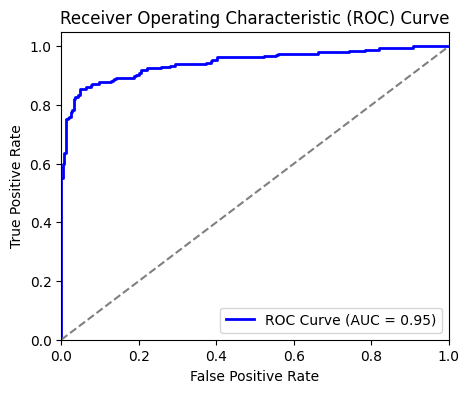

In [ ]:
logistic_r= LogisticRegression(penalty='l2', # Regularization type
                        C=1.7,               # Inverse of regularization strength
                        tol=1e-4,            # Tolerance for stopping criteria
                        max_iter=100,        # Maximum number of iterations
                        random_state=7)
# Fit the model on the training data
logistic_r.fit(X_train, y_train)
evaluate(logistic_r,X_train,X_test,y_train,y_test)

##**RANDOM FOREST**

TRAINING RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [  1 987]]
ACCURACY SCORE:
0.999
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.998985    1.000000  0.999493     0.999492      0.999493
recall       1.000000    0.998988  0.999493     0.999494      0.999493
f1-score     0.999492    0.999494  0.999493     0.999493      0.999493
support    984.000000  988.000000  0.999493  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[240   9]
 [ 17 228]]
ACCURACY SCORE:
0.947
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.933852    0.962025  0.947368    0.947939      0.947825
recall       0.963855    0.930612  0.947368    0.947234      0.947368
f1-score     0.948617    0.946058  0.947368    0.947337      0.947348
support    249.000000  245.000000  0.947368  494.000000    494.000000

ROC AUC Score: 0.98


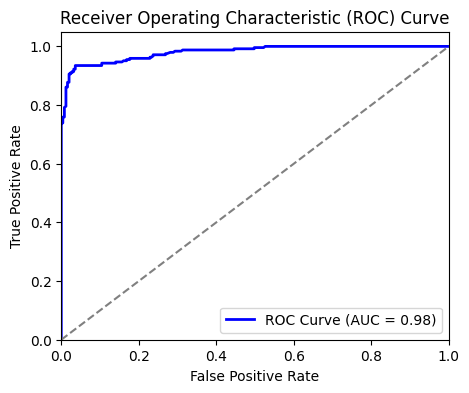

In [ ]:
random_f = RandomForestClassifier(max_depth=None,
                            n_estimators=40,
                            criterion='entropy',
                            min_samples_split=4,
                            min_samples_leaf=1,
                            random_state=0)

# Fit the model on the training data
random_f.fit(X_train, y_train)
evaluate(random_f,X_train,X_test,y_train,y_test)

## **XG BOOST**

TRAINING RESULTS: 
CONFUSION MATRIX:
[[951  33]
 [ 92 896]]
ACCURACY SCORE:
0.937
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.911793    0.964478  0.936613     0.938135      0.938189
recall       0.966463    0.906883  0.936613     0.936673      0.936613
f1-score     0.938333    0.934794  0.936613     0.936563      0.936560
support    984.000000  988.000000  0.936613  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[238  11]
 [ 28 217]]
ACCURACY SCORE:
0.921
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894737    0.951754  0.921053    0.923246      0.923015
recall       0.955823    0.885714  0.921053    0.920769      0.921053
f1-score     0.924272    0.917548  0.921053    0.920910      0.920937
support    249.000000  245.000000  0.921053  494.000000    494.000000

ROC AUC Score: 0.97


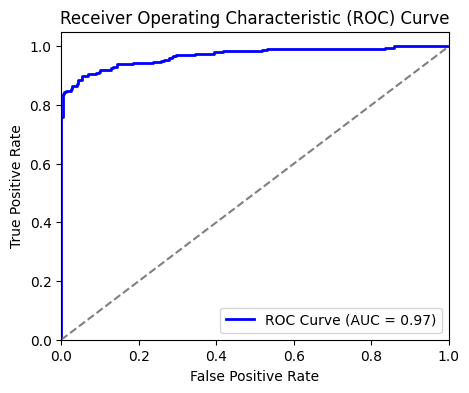

In [ ]:
# Create the XGBoost classifier
xgb_clf = XGBClassifier(
    max_depth=2,         # Maximum depth of the trees
    learning_rate=0.1,   # Learning rate (eta)
    n_estimators=120,    # Number of boosting rounds
    objective='binary:logistic',  # Logistic regression for binary classification
    random_state=42
)

# Fit the model on the training data
xgb_clf.fit(X_train, y_train)

# Evaluate the model using your existing evaluate function
evaluate(xgb_clf, X_train, X_test, y_train, y_test)


##**ARTIFICIAL NUERAL NETWORK**

In [ ]:
ann_clf = MLPClassifier(hidden_layer_sizes=72,
                        activation='tanh',
                        solver='lbfgs',
                        learning_rate_init=1e-4,
                        tol=1e-3,
                        alpha=0.1,
                        max_iter=26,
                        verbose=True,
                        batch_size=6,
                        random_state=0
                        )

# Fit the model on the training data
ann_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ann = ann_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.925


TRAINING RESULTS: 
CONFUSION MATRIX:
[[974  10]
 [ 12 976]]
ACCURACY SCORE:
0.989
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.987830    0.989858  0.988844     0.988844      0.988846
recall       0.989837    0.987854  0.988844     0.988846      0.988844
f1-score     0.988832    0.988855  0.988844     0.988844      0.988844
support    984.000000  988.000000  0.988844  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[228  21]
 [ 16 229]]
ACCURACY SCORE:
0.925
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934426    0.916000  0.925101    0.925213      0.925288
recall       0.915663    0.934694  0.925101    0.925178      0.925101
f1-score     0.924949    0.925253  0.925101    0.925101      0.925100
support    249.000000  245.000000  0.925101  494.000000    494.000000

ROC AUC Score: 0.97


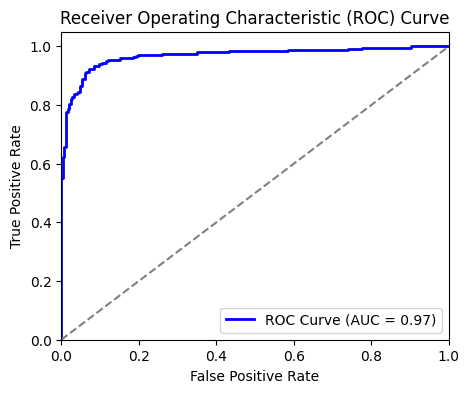

In [ ]:
evaluate(ann_clf, X_train, X_test, y_train, y_test)

# **ENSEMBEL** **MODELS**


# **ESM1**-Random forest,Artificial Neural Network,Logistic Regression

In [ ]:
# Step 1: Define the base models and the meta learner
# Base model 1: Random Forest
rf_clf = RandomForestClassifier(max_depth=None, n_estimators=100, criterion='entropy',
                                min_samples_split=4, min_samples_leaf=3,random_state=0)

# Base model 2: Artificial Neural Network (MLP)
ann_clf = MLPClassifier(hidden_layer_sizes=(59,), activation='tanh', solver='adam',
                        learning_rate_init=1e-3, max_iter=999, batch_size=32,random_state=0)

# Meta-learner: Logistic Regression
meta_learner = LogisticRegression(penalty='l2', C=1.6, tol=1e-3, max_iter=200,random_state=1)

# Step 2: Create a list of the base models to be stacked
base_models = [
    ('rf', rf_clf),
    ('ann', ann_clf)
]

# Step 3: Create the Stacking Classifier using Logistic Regression as meta-learner
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5
)

# Step 5: Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of ESM1 (Stacking Classifier): {accuracy * 100:.2f}%")


Test Accuracy of ESM1 (Stacking Classifier): 95.14%


TRAINING RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [  0 988]]
ACCURACY SCORE:
1.000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    984.0  988.0       1.0     1972.0        1972.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[238  11]
 [ 13 232]]
ACCURACY SCORE:
0.951
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.948207    0.954733  0.951417    0.951470      0.951443
recall       0.955823    0.946939  0.951417    0.951381      0.951417
f1-score     0.952000    0.950820  0.951417    0.951410      0.951415
support    249.000000  245.000000  0.951417  494.000000    494.000000

ROC AUC Score: 0.98


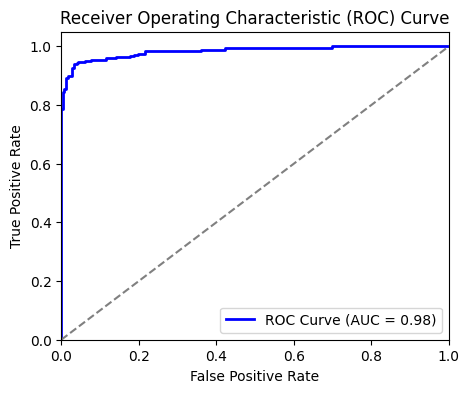

In [ ]:
evaluate(stacking_clf, X_train, X_test, y_train, y_test)

# **ENSM2**-Random Forest,ANN,XG BOOST,Logistic Regression

In [ ]:
# Base model 1: Random Forest
rf_clf = RandomForestClassifier(max_depth=None, n_estimators=100, criterion='gini',
                                min_samples_split=2, min_samples_leaf=1, random_state=0)

# Base model 2: Artificial Neural Network (MLP)
ann_clf = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='adam',
                        learning_rate_init=1e-3, max_iter=999, batch_size=32, random_state=7)

# Base model 3: XGBoost with early stopping
xgb_clf = XGBClassifier(max_depth=None, eta=1, objective='binary:logistic',
                        n_estimators=400, random_state=0,early_stopping_round=100)

meta_learnerr = LogisticRegression(penalty='l2', C=1.62, tol=1e-2, max_iter=400, random_state=0)
# Step 2: Create a list of the base models to be stacked
base_modelss = [
    ('rf', rf_clf),
    ('ann', ann_clf),
    ('xgb', xgb_clf)
]

# Step 3: Create the Stacking Classifier using Logistic Regression as the meta-learner
stacking_cllf = StackingClassifier(
    estimators=base_modelss,
    final_estimator=meta_learnerr,
    cv=5  # 5-fold cross-validation
)

# Step 5: Train the Stacking Classifier
stacking_cllf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred2 = stacking_cllf.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Test Accuracy of ESM2 (Stacking Classifier): {accuracy * 100:.2f}%")


Test Accuracy of ESM2 (Stacking Classifier): 94.53%


TRAINING RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [  0 988]]
ACCURACY SCORE:
1.000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    984.0  988.0       1.0     1972.0        1972.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[234  15]
 [ 12 233]]
ACCURACY SCORE:
0.945
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.951220    0.939516  0.945344    0.945368      0.945415
recall       0.939759    0.951020  0.945344    0.945390      0.945344
f1-score     0.945455    0.945233  0.945344    0.945344      0.945345
support    249.000000  245.000000  0.945344  494.000000    494.000000

ROC AUC Score: 0.98


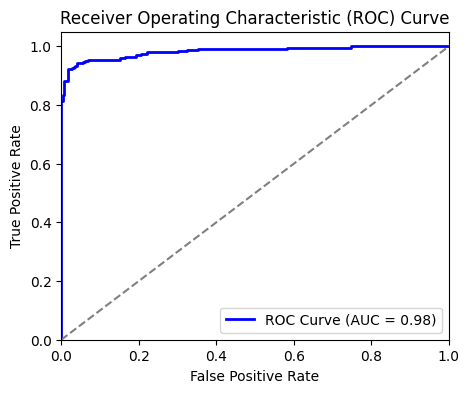

In [ ]:
evaluate(stacking_cllf, X_train, X_test, y_train, y_test)

# **ESM3**-Random Forest,ANN,XG BOOST,SVM,Logistic Regression

In [ ]:
# Base model 1: Random Forest
rf_clf = RandomForestClassifier(max_depth=None, n_estimators=100, criterion='entropy',
                                min_samples_split=2, min_samples_leaf=3, random_state=0)

# Base model 2: Artificial Neural Network (MLP)
ann_clf = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', solver='adam',
                        learning_rate_init=1e-4, max_iter=999, batch_size=32, random_state=0)

# Base model 3: XGBoost with early stopping
xgb_clf = XGBClassifier(max_depth=25, eta=1.6, objective='binary:logistic',
                        n_estimators=400, random_state=7,early_stopping_round=100, use_label_encoder=False)


# Base model 4: Support Vector Machine (SVM)
svm_clf = SVC(C=1, kernel='linear', max_iter=150, tol=1e-4, probability=True, random_state=0)


# Meta-learner: Logistic Regression
metaa_learner = LogisticRegression(penalty='l2', C=1.62, tol=1e-4, max_iter=360, random_state=0)

# Step 2: Create a list of the base models to be stacked
basee_models = [
    ('rf', rf_clf),
    ('ann', ann_clf),
    ('xgb', xgb_clf),
    ('svm', svm_clf)
]

# Step 3: Create the Stacking Classifier using Logistic Regression as the meta-learner
stacking_clff = StackingClassifier(
    estimators=basee_models,
    final_estimator=metaa_learner,
    cv=5  # 5-fold cross-validation
)

# Step 5: Train the Stacking Classifier
stacking_clff.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred3 = stacking_clff.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Test Accuracy of IESM3 (Stacking Classifier): {accuracy * 100:.2f}%")


Test Accuracy of IESM3 (Stacking Classifier): 94.94%


TRAINING RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [  0 988]]
ACCURACY SCORE:
1.000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    984.0  988.0       1.0     1972.0        1972.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[238  11]
 [ 14 231]]
ACCURACY SCORE:
0.949
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944444    0.954545  0.949393    0.949495      0.949454
recall       0.955823    0.942857  0.949393    0.949340      0.949393
f1-score     0.950100    0.948665  0.949393    0.949383      0.949388
support    249.000000  245.000000  0.949393  494.000000    494.000000

ROC AUC Score: 0.98


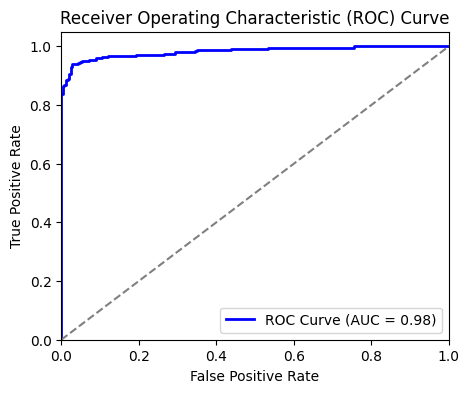

In [ ]:
evaluate(stacking_clff, X_train, X_test, y_train, y_test)

# **OTHER** **MODELS**

# **CATBOOST**

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=1000,              # Reduce number of iterations
    learning_rate=0.01,          # Lower learning rate
    depth=6,                      # Shallower trees
    l2_leaf_reg=15,               # Stronger L2 regularization
    subsample=0.5,                # Subsample of data
    random_strength=12,           # Add more randomness
    bagging_temperature=3,        # Increase randomness in data sampling
    colsample_bylevel=0.9,        # Feature sampling at each level
    early_stopping_rounds=100,     # Early stopping to prevent overfitting
    auto_class_weights='Balanced',# Adjust class weights if imbalanced data
    loss_function='Logloss',      # Loss function
    verbose=100                   # Verbose output
)
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.4f}')




0:	learn: 0.6914379	total: 55.3ms	remaining: 55.3s
100:	learn: 0.5481636	total: 652ms	remaining: 5.8s
200:	learn: 0.4737666	total: 1.69s	remaining: 6.71s
300:	learn: 0.4201048	total: 2.51s	remaining: 5.83s
400:	learn: 0.3767514	total: 3.47s	remaining: 5.18s
500:	learn: 0.3432705	total: 5.12s	remaining: 5.1s
600:	learn: 0.3135117	total: 7.15s	remaining: 4.75s
700:	learn: 0.2888915	total: 9.3s	remaining: 3.97s
800:	learn: 0.2663510	total: 11.9s	remaining: 2.94s
900:	learn: 0.2430562	total: 14s	remaining: 1.54s
999:	learn: 0.2154016	total: 15.9s	remaining: 0us
Accuracy: 0.9291


TRAINING RESULTS: 
CONFUSION MATRIX:
[[963  21]
 [ 45 943]]
ACCURACY SCORE:
0.967
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.955357    0.978216  0.966531     0.966786      0.966810
recall       0.978659    0.954453  0.966531     0.966556      0.966531
f1-score     0.966867    0.966189  0.966531     0.966528      0.966527
support    984.000000  988.000000  0.966531  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[235  14]
 [ 21 224]]
ACCURACY SCORE:
0.929
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.917969    0.941176   0.92915    0.929573      0.929479
recall       0.943775    0.914286   0.92915    0.929030      0.929150
f1-score     0.930693    0.927536   0.92915    0.929115      0.929127
support    249.000000  245.000000   0.92915  494.000000    494.000000

ROC AUC Score: 0.97


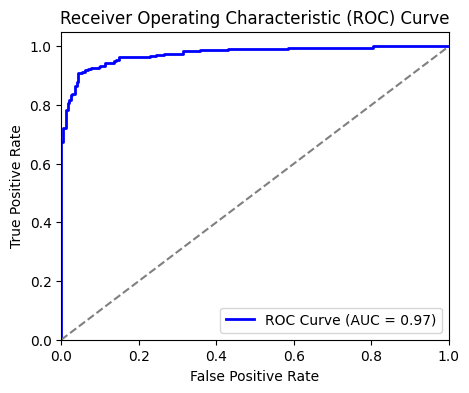

In [ ]:
evaluate(catboost_model, X_train, X_test, y_train, y_test)

## **LIGHTGBM**

In [ ]:
lgbm_boosting_model = LGBMClassifier(boosting_type='gbdt',  # Gradient Boosting Decision Tree (GBDT)
                                     num_leaves=6,         # Number of leaves in full tree
                                     learning_rate=0.1,     # Learning rate
                                     n_estimators=100,      # Number of boosting iterations
                                     max_depth=-1,          # Max depth of the trees (-1 means no limit)
                                     random_state=8,        # For reproducibility
                                     verbose=-1)            # Suppress output

# Fit the boosting model
lgbm_boosting_model.fit(X_train, y_train)

# Predict on the test data
yy_pred = lgbm_boosting_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, yy_pred)
print("LightGBM boosting model accuracy on test data: %.4f" % test_accuracy)

LightGBM boosting model accuracy on test data: 0.9433


TRAINING RESULTS: 
CONFUSION MATRIX:
[[971  13]
 [ 88 900]]
ACCURACY SCORE:
0.949
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.916903    0.985761  0.948783     0.951332      0.951402
recall       0.986789    0.910931  0.948783     0.948860      0.948783
f1-score     0.950563    0.946870  0.948783     0.948716      0.948713
support    984.000000  988.000000  0.948783  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[244   5]
 [ 23 222]]
ACCURACY SCORE:
0.943
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.913858    0.977974   0.94332    0.945916      0.945656
recall       0.979920    0.906122   0.94332    0.943021      0.943320
f1-score     0.945736    0.940678   0.94332    0.943207      0.943228
support    249.000000  245.000000   0.94332  494.000000    494.000000

ROC AUC Score: 0.97


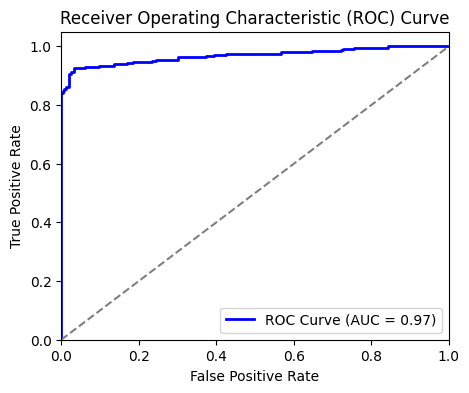

In [ ]:
evaluate(lgbm_boosting_model, X_train, X_test, y_train, y_test)

##**BAGGING MODEL**

# **HYBRID** **MODEL**

In [ ]:
# Bagging Models
bagging_rf = RandomForestClassifier(max_depth=None,
                            n_estimators=100,
                            criterion='gini',
                            min_samples_split=3,
                            min_samples_leaf=2,
                            random_state=7)
bagging_dt = BaggingClassifier(n_estimators=400, random_state=7)
bagging_et = SVC(kernel='linear',C=1.6,             # Using linear kernel
                tol=1e-2,               # Toler               # One-vs-Rest strategy for multi-class classification
                random_state=7)

# Boosting Models
boosting_gbm = LGBMClassifier(boosting_type='gbdt',             # Gradient boosting decision trees
                            num_leaves=6,                   # Maximum leaves per tree
                            learning_rate=0.1,               # Learning rate for boosting
                            n_estimators=90,                # Number of boosting rounds
                            max_depth=-1,                    # No limit on tree depth
                            random_state=7,
                            verbose=-1,
                            )
boosting_adaboost = AdaBoostClassifier(n_estimators=100, random_state=7)
boosting_xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=7)

# Fit Bagging Models
bagging_rf.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)
bagging_et.fit(X_train, y_train)

# Fit Boosting Models
boosting_gbm.fit(X_train, y_train)
boosting_adaboost.fit(X_train, y_train)
boosting_xgb.fit(X_train, y_train)

# Generate predictions for stacking
bagging_preds = np.column_stack((
    bagging_rf.predict(X_test),
    bagging_dt.predict(X_test),
    bagging_et.predict(X_test)
))

boosting_preds = np.column_stack((
    boosting_gbm.predict(X_test),
    boosting_adaboost.predict(X_test),
    boosting_xgb.predict(X_test)
))

# Combine all predictions
stacking_preds = np.column_stack((bagging_preds, boosting_preds))

# Train the meta-learner
meta_learner = LogisticRegression(solver='liblinear', penalty='l1',        # Regularization type
                        C=1.6,               # Inverse of regularization strength
                        tol=1e-2,            # Tolerance for stopping criteria
                        max_iter=100,        # Maximum number of iterations
                        random_state=0)
meta_learner.fit(stacking_preds, y_test)

# Make final predictions
final_predictions = meta_learner.predict(stacking_preds)

# Evaluate the model
accuracy = accuracy_score(y_test, final_predictions)
print(f'Accuracy of the Hybrid Ensemble: {accuracy:.3f}')


Accuracy of the Hybrid Ensemble: 0.953


TRAINING RESULTS: 
CONFUSION MATRIX:
[[972  12]
 [ 70 918]]
ACCURACY SCORE:
0.958
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.932821    0.987097  0.958418     0.959959      0.960014
recall       0.987805    0.929150  0.958418     0.958477      0.958418
f1-score     0.959526    0.957247  0.958418     0.958387      0.958384
support    984.000000  988.000000  0.958418  1972.000000   1972.000000

TESTING RESULTS: 
CONFUSION MATRIX:
[[243   6]
 [ 17 228]]
ACCURACY SCORE:
0.953
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934615    0.974359  0.953441    0.954487      0.954326
recall       0.975904    0.930612  0.953441    0.953258      0.953441
f1-score     0.954813    0.951983  0.953441    0.953398      0.953410
support    249.000000  245.000000  0.953441  494.000000    494.000000

ROC AUC Score: 0.97


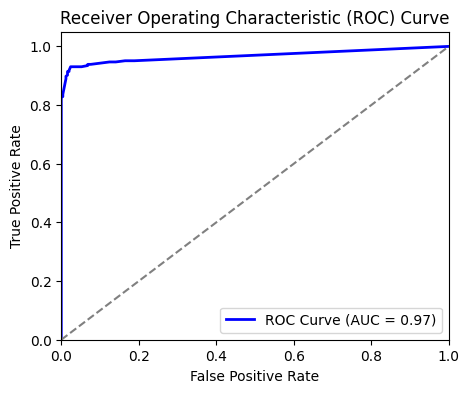

In [ ]:
# Generate predictions for stacking (training set)
bagging_train_preds = np.column_stack((
    bagging_rf.predict(X_train),
    bagging_dt.predict(X_train),
    bagging_et.predict(X_train)
))

boosting_train_preds = np.column_stack((
    boosting_gbm.predict(X_train),
    boosting_adaboost.predict(X_train),
    boosting_xgb.predict(X_train)
))

# Combine all training predictions
stacking_train_preds = np.column_stack((bagging_train_preds, boosting_train_preds))

# Call the evaluate function with stacked predictions
evaluate(meta_learner, stacking_train_preds, stacking_preds, y_train, y_test)
